In [35]:
#第四类蠕虫病毒恶意软件EDA
#特点：复制自身，感染其他机器，与感染性病毒相比，具有传播性，传播性没在数据中找到体现，LdrLoadDll +Thread32Next，
import pandas as pd
data_df4=pd.read_csv('label4.csv')

In [36]:
data_df4.head()

,file_id,label,api,tid,return_value,index
0,1449,4,CoInitializeEx,532,0,1984
1,1449,4,NtQueryKey,532,0,1985
2,1449,4,NtOpenKeyEx,532,-1073741772,1994
3,1449,4,NtQueryKey,532,0,1995
4,1449,4,NtOpenKeyEx,532,0,1996


In [37]:
api=data_df4['api'].value_counts()

In [38]:
api

RegOpenKeyExW                 38312
RegQueryValueExW              33797
NtClose                       29448
RegCloseKey                   24546
LdrGetProcedureAddress        23099
GetForegroundWindow           17870
NtDelayExecution              17389
GetSystemMetrics              15704
NtAllocateVirtualMemory       14937
GetKeyState                   13800
Thread32Next                   7083
LdrLoadDll                     6298
NtQueryKey                     5517
NtReadFile                     5430
GetSystemTimeAsFileTime        4838
NtQueryValueKey                4510
NtOpenKeyEx                    4341
GetCursorPos                   2897
LdrGetDllHandle                2888
NtMapViewOfSection             2880
LoadStringW                    2707
SetErrorMode                   2589
NtUnmapViewOfSection           2420
NtDuplicateObject              2390
accept                         2031
RegEnumKeyExW                  1916
NtFreeVirtualMemory            1887
GetFileAttributesW          

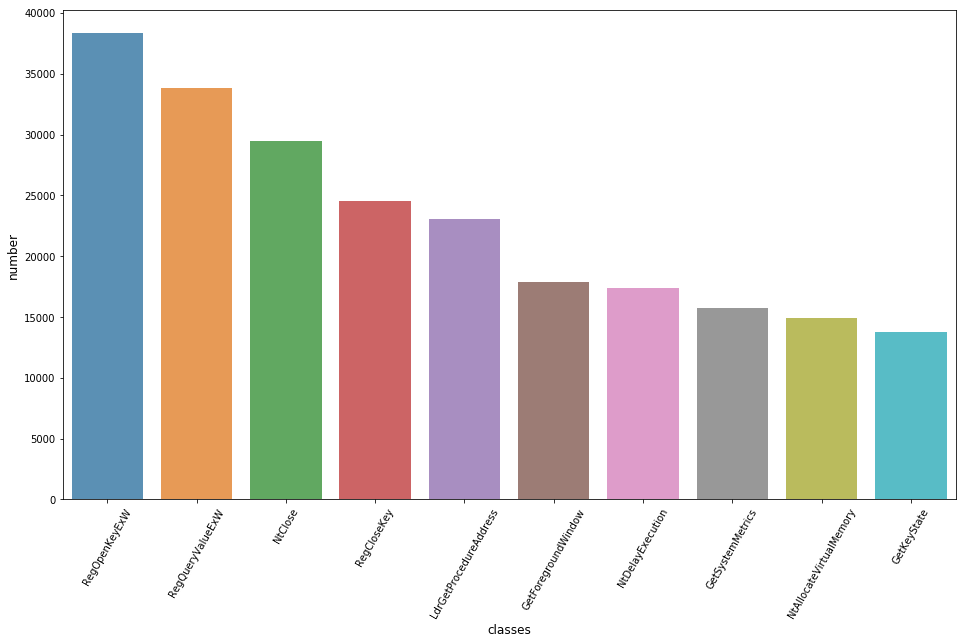

In [39]:
#所有文件中top api调用数量
#柱状图
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,9))
sns.barplot(api.index[0:10],api.values[0:10],alpha=0.8)
plt.xticks(rotation=60)
plt.xlabel("classes",fontsize = 12)
plt.ylabel("number",fontsize=12)
plt.show()

In [40]:
every_file4=data_df4.groupby('file_id')['api'].count().sort_values(ascending=False)

In [41]:
every_file4

file_id
30005     36725
82372     25005
9924      20004
27254     16616
38358     16508
53436     15704
104291    14187
84954     13423
24432     12905
107429    11731
1449      11514
97672     10975
114548    10800
67433      9436
28322      8295
46738      8008
73236      7629
107416     7572
42194      7525
32501      7225
89863      6932
11197      6459
102601     6378
19232      5731
113817     5001
13396      5001
58358      4080
61351      4024
93116      3024
42195      2022
104945     2014
19688      2008
58404      2008
18940      2005
24939      2003
54831      1546
22783      1514
100862     1511
55852      1510
25539      1508
98272      1507
69517      1504
68487       560
93493       518
7728        271
11512       265
91504       219
36235       195
74450       193
100861      131
13627       131
42112        51
102742       33
Name: api, dtype: int64

In [42]:
import numpy
index=[]
for i in range(len(every_file4)):
    index.append(i)
index=numpy.array(index)

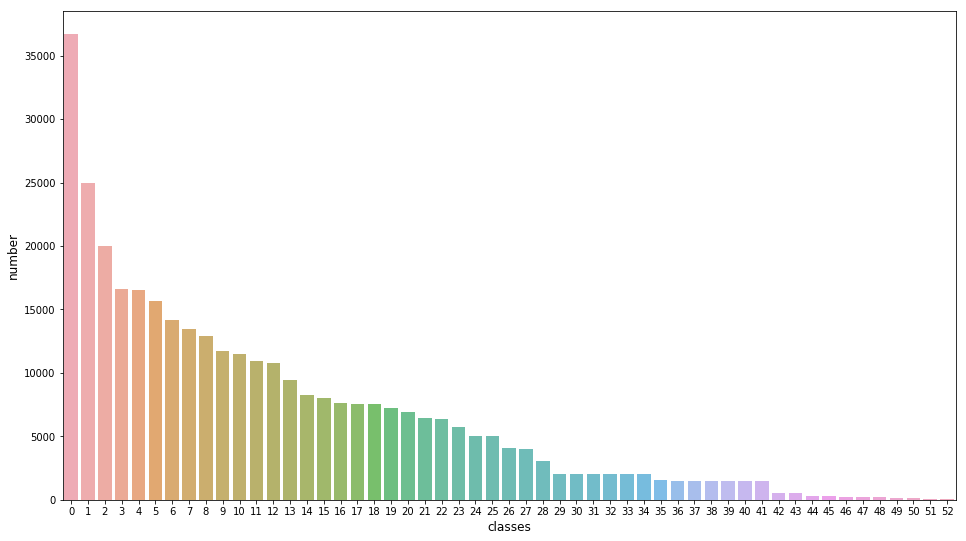

In [43]:
#每个文件调用api数量分布图，每个文件之间对比
#柱状图
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

plt.figure(figsize=(16,9))
sns.barplot(index[0:100],every_file4.values[0:100],alpha=0.8)
plt.xlabel("classes",fontsize = 12)
plt.ylabel("number",fontsize=12)
plt.show()

/home/admin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


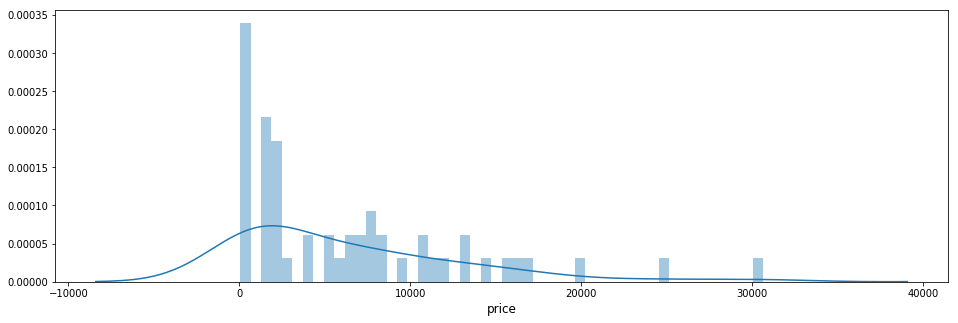

In [44]:

#文件调用api数量分布直方图
ulimit_start = numpy.percentile(every_file4.values,1)
ulimit_end = numpy.percentile(every_file4.values,99)
every_file4.loc[[every_file4.iloc[i]<ulimit_start for i in range(len(every_file4))]]=ulimit_start
every_file4.loc[[every_file4.iloc[i]>ulimit_end for i in range(len(every_file4))]]=ulimit_end
plt.figure(figsize=(16,5))
sns.distplot(every_file4.values,bins=50,kde=True)
plt.xlabel('price',fontsize=12)
plt.show()

In [45]:
every_file4

file_id
30005     30630.60
82372     25005.00
9924      20004.00
27254     16616.00
38358     16508.00
53436     15704.00
104291    14187.00
84954     13423.00
24432     12905.00
107429    11731.00
1449      11514.00
97672     10975.00
114548    10800.00
67433      9436.00
28322      8295.00
46738      8008.00
73236      7629.00
107416     7572.00
42194      7525.00
32501      7225.00
89863      6932.00
11197      6459.00
102601     6378.00
19232      5731.00
113817     5001.00
13396      5001.00
58358      4080.00
61351      4024.00
93116      3024.00
42195      2022.00
104945     2014.00
19688      2008.00
58404      2008.00
18940      2005.00
24939      2003.00
54831      1546.00
22783      1514.00
100862     1511.00
55852      1510.00
25539      1508.00
98272      1507.00
69517      1504.00
68487       560.00
93493       518.00
7728        271.00
11512       265.00
91504       219.00
36235       195.00
74450       193.00
100861      131.00
13627       131.00
42112        51.00
1027

In [46]:
#第一个文件散点图
file_1=data_df4[data_df4['file_id']==102742]

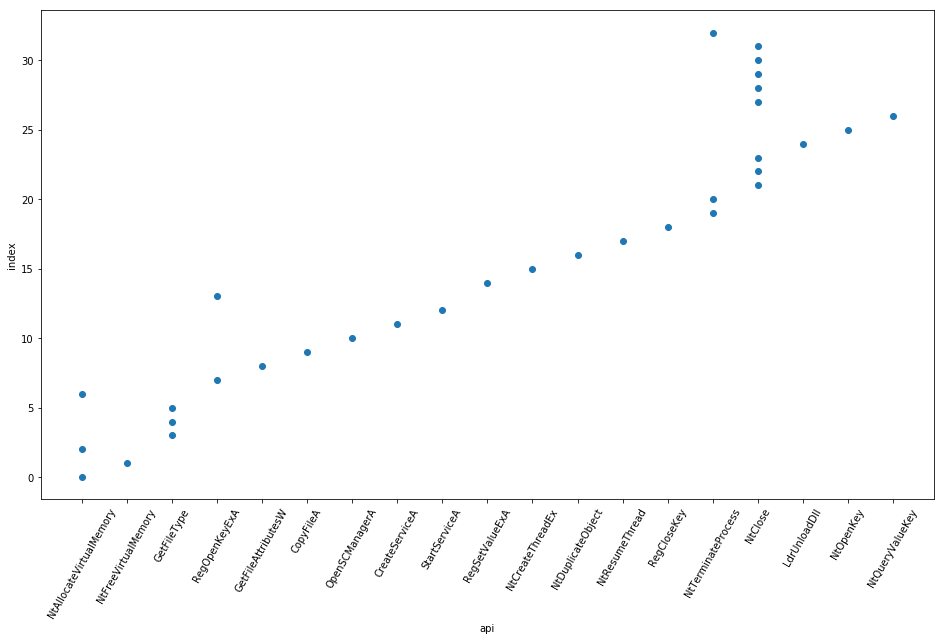

In [47]:
plt.figure(figsize=(16,9))
plt.scatter((file_1['api'].values),file_1['index'])
plt.xticks(rotation=60)
plt.yticks(rotation=360)
plt.xlabel('api',fontsize=10)
plt.ylabel('index',fontsize=10)
plt.show()

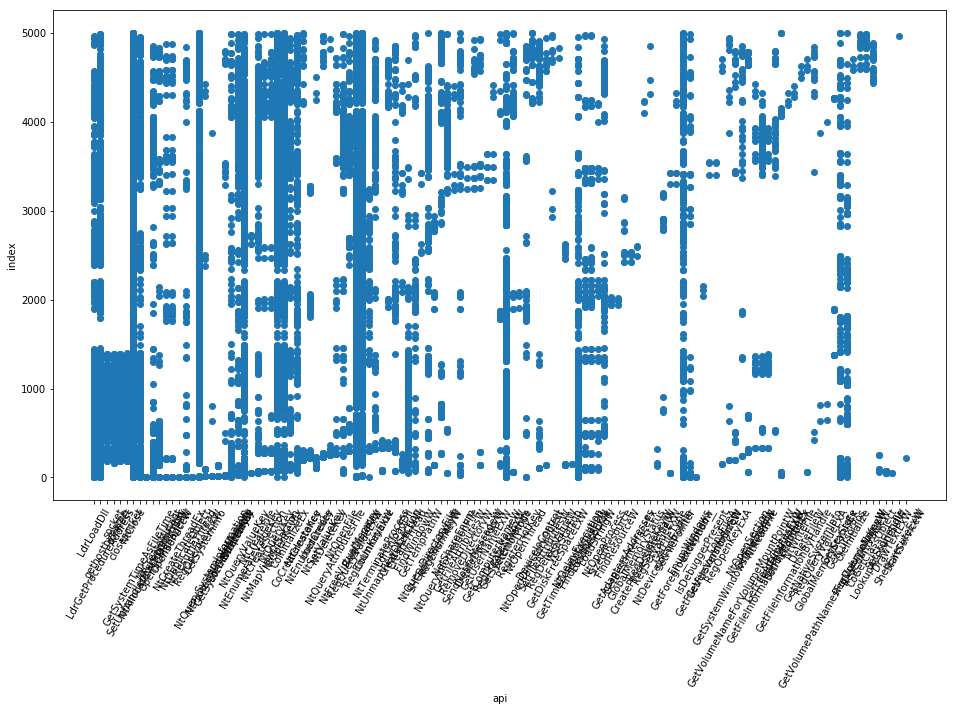

In [48]:
#第%99个文件散点图
file_4=data_df4[data_df4['file_id']==30005]
plt.figure(figsize=(16,9))
plt.scatter((file_4['api'].values),file_4['index'])
plt.xticks(rotation=60)
plt.yticks(rotation=360)
plt.xlabel('api',fontsize=10)
plt.ylabel('index',fontsize=10)
plt.show()

In [49]:
every_file4[0:13]

file_id
30005     30630.6
82372     25005.0
9924      20004.0
27254     16616.0
38358     16508.0
53436     15704.0
104291    14187.0
84954     13423.0
24432     12905.0
107429    11731.0
1449      11514.0
97672     10975.0
114548    10800.0
Name: api, dtype: float64

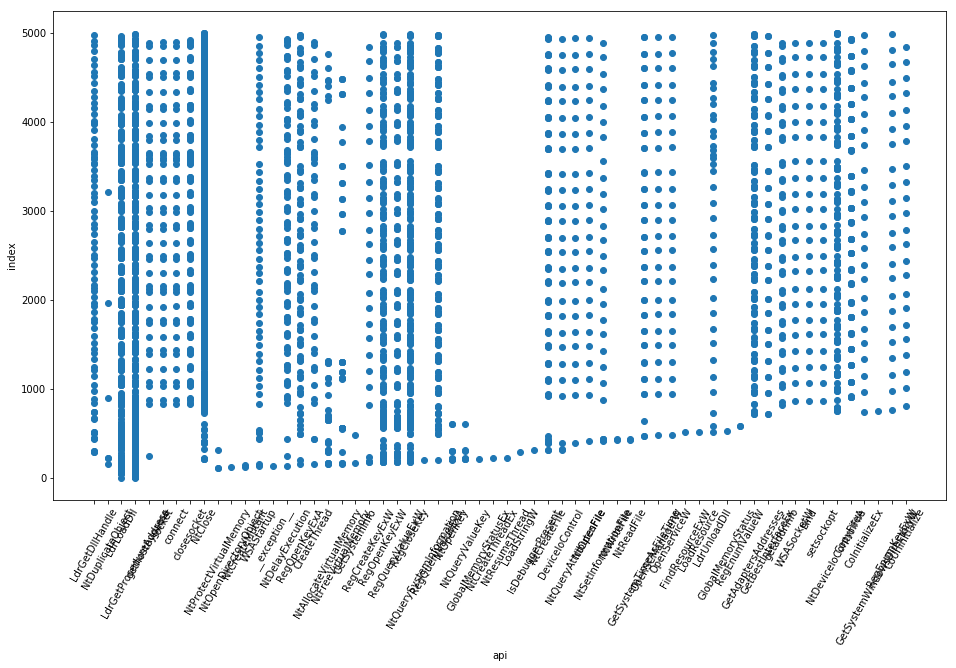

In [50]:
#第%50个文件全部线程散点图
file_2=data_df4[data_df4['file_id']==13396]
plt.figure(figsize=(16,9))
plt.scatter((file_2['api'].values),file_2['index'])
plt.xticks(rotation=60)
plt.yticks(rotation=360)
plt.xlabel('api',fontsize=10)
plt.ylabel('index',fontsize=10)
plt.show()

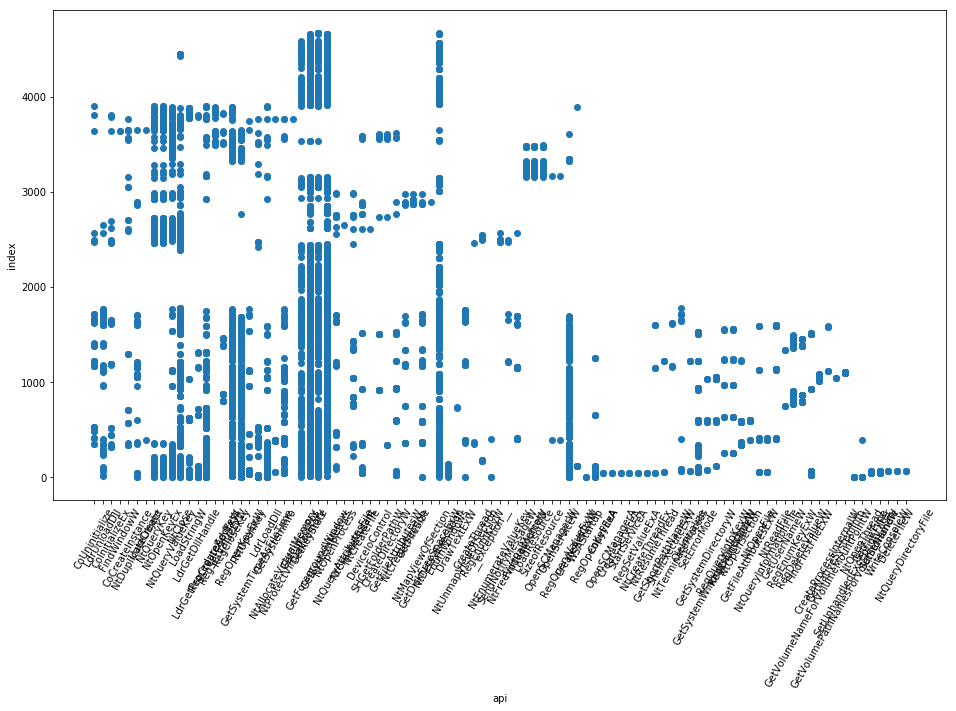

In [51]:
#第25%个文件散点图
file_3=data_df4[data_df4['file_id']==114548 ]
plt.figure(figsize=(16,9))
plt.scatter((file_3['api'].values),file_3['index'])
plt.xticks(rotation=60)
plt.yticks(rotation=360)
plt.xlabel('api',fontsize=10)
plt.ylabel('index',fontsize=10)
plt.show()

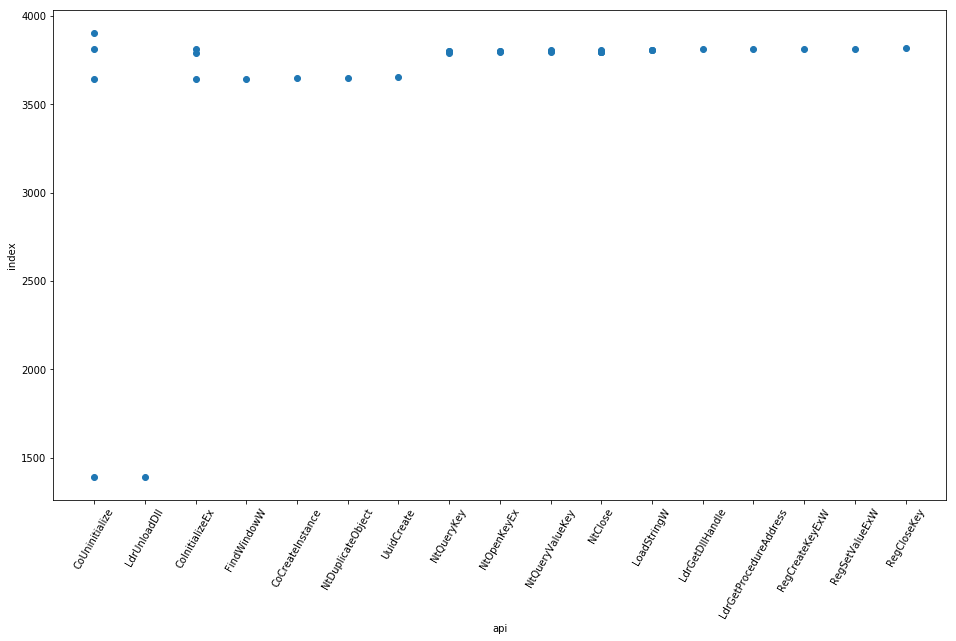

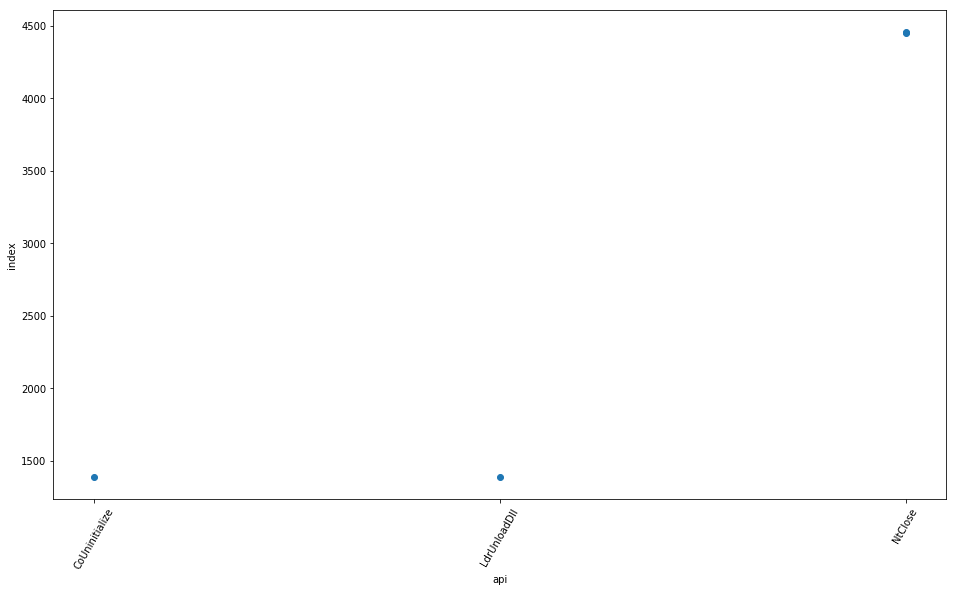

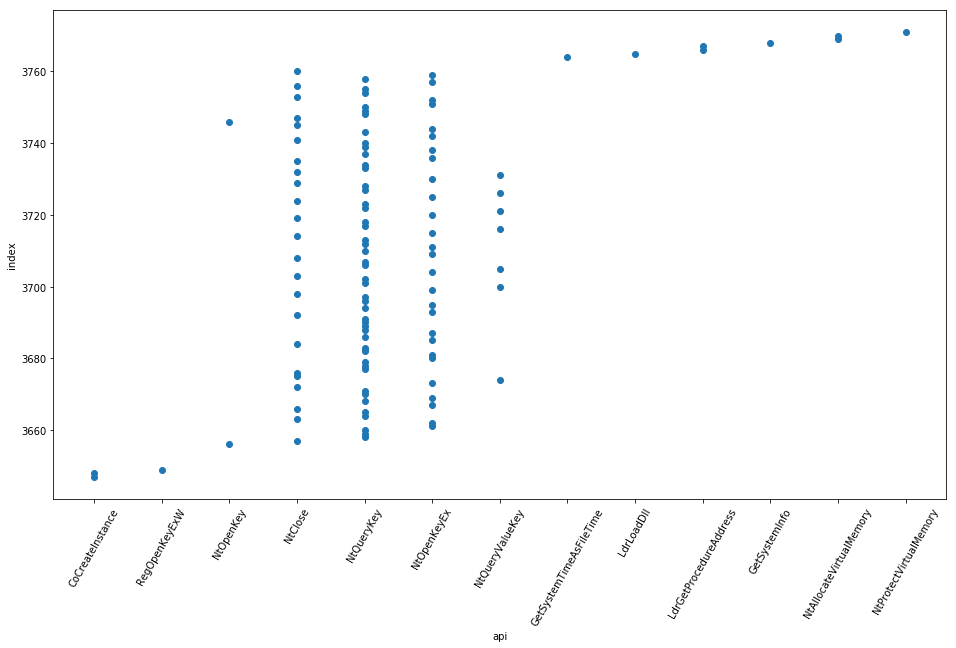

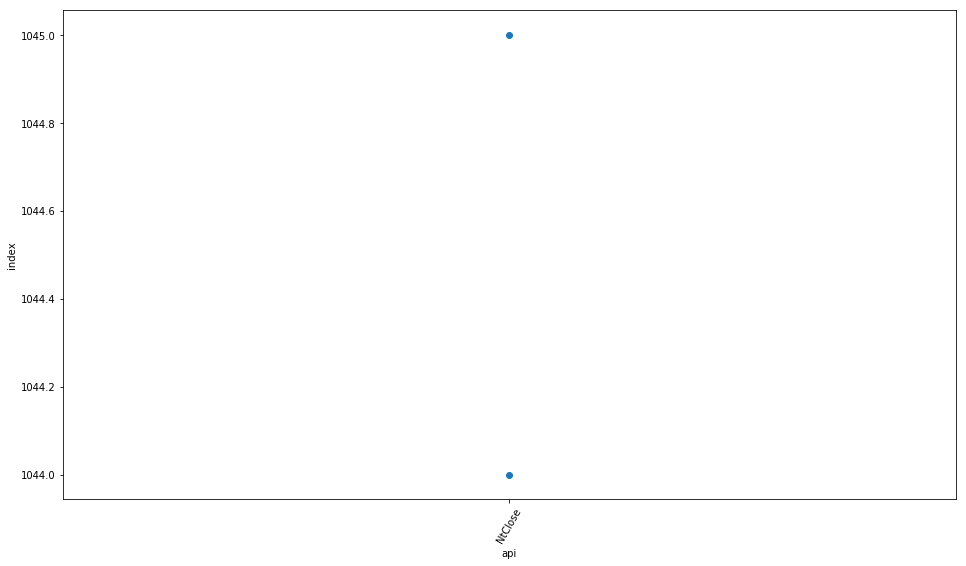

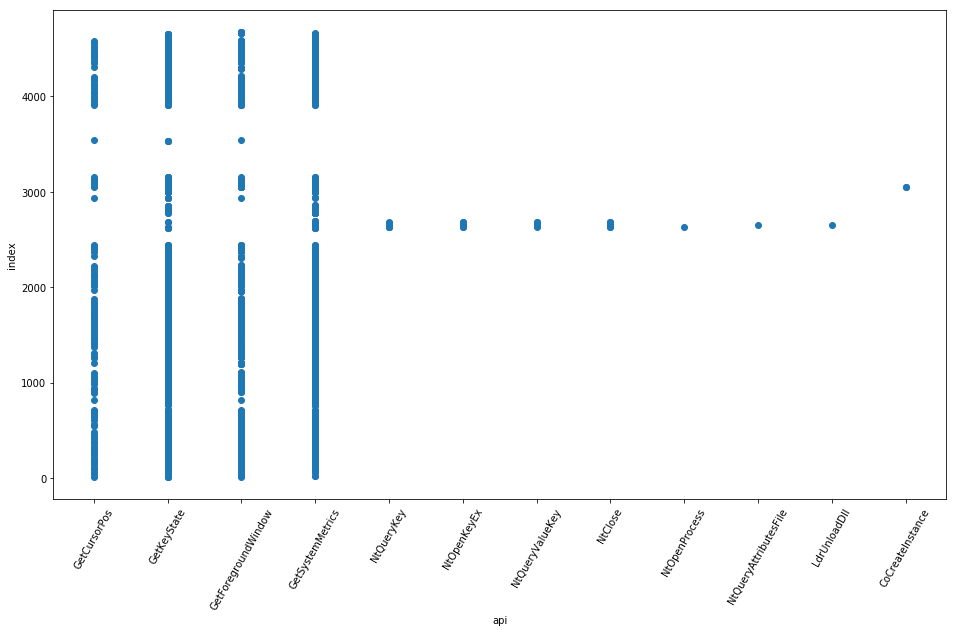

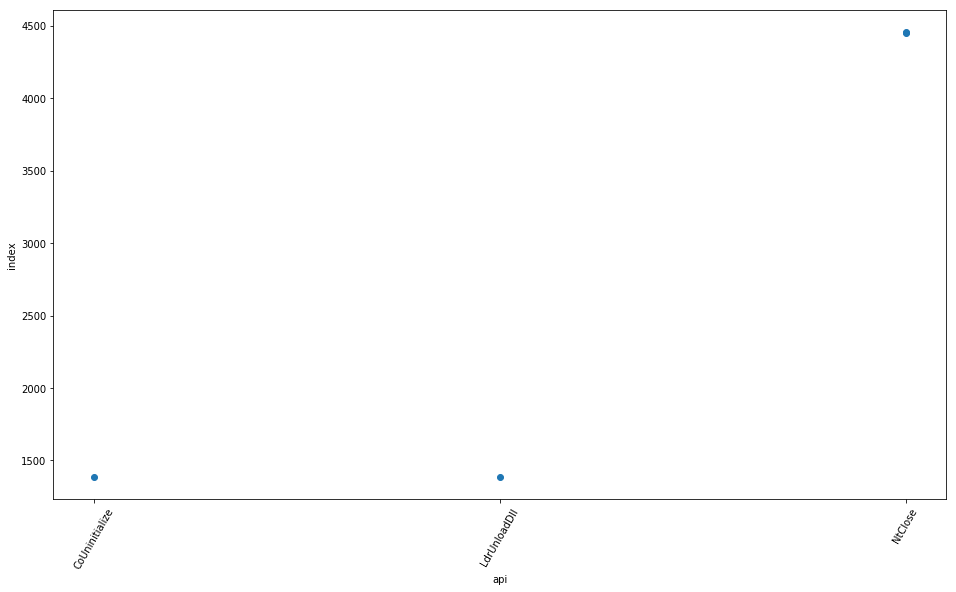

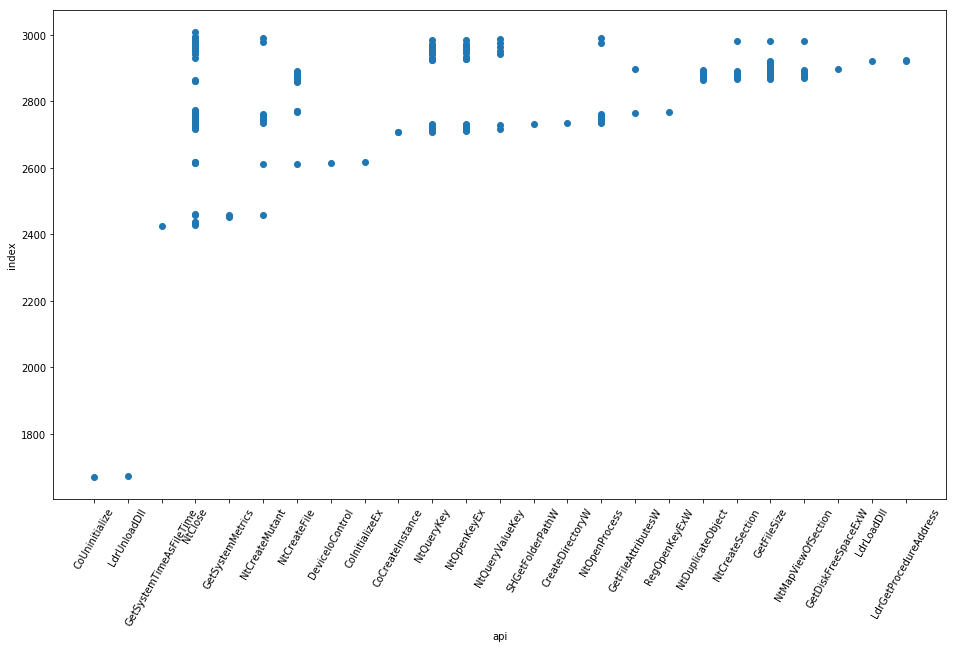

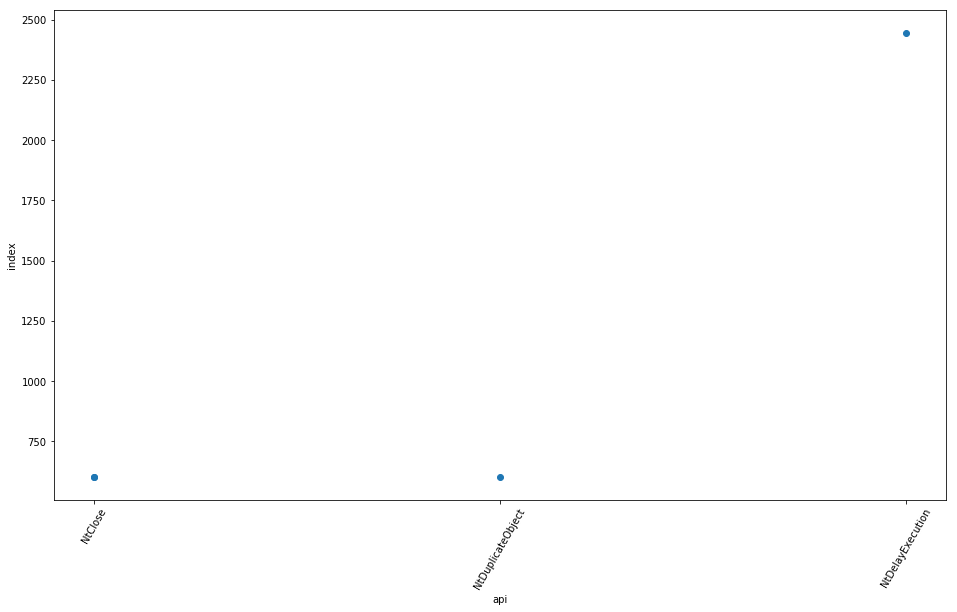

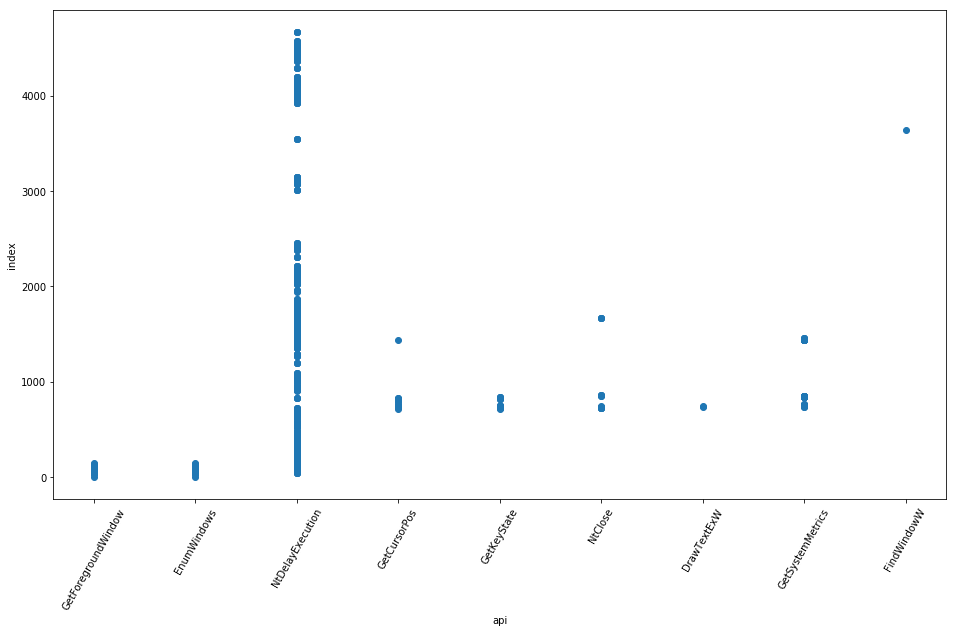

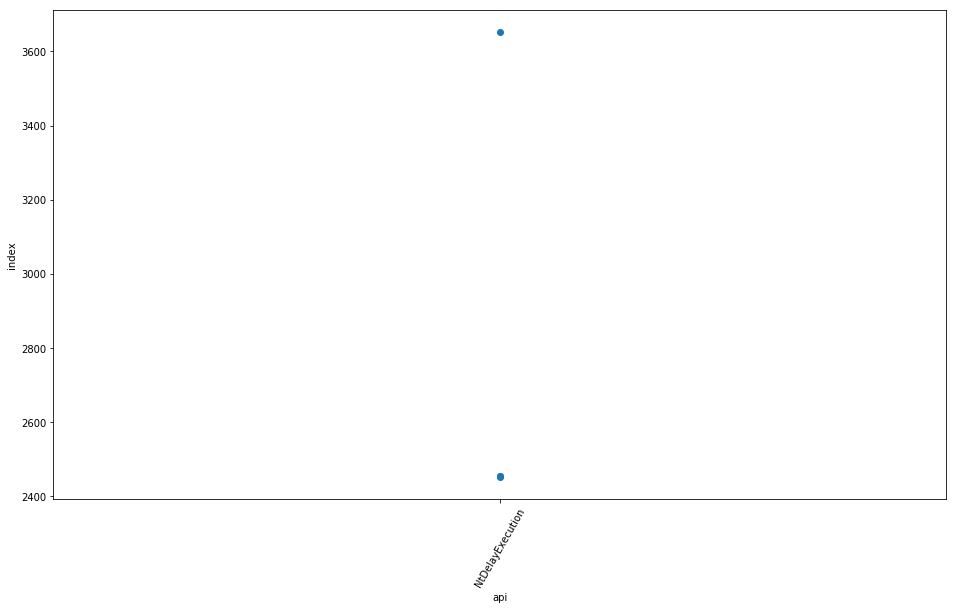

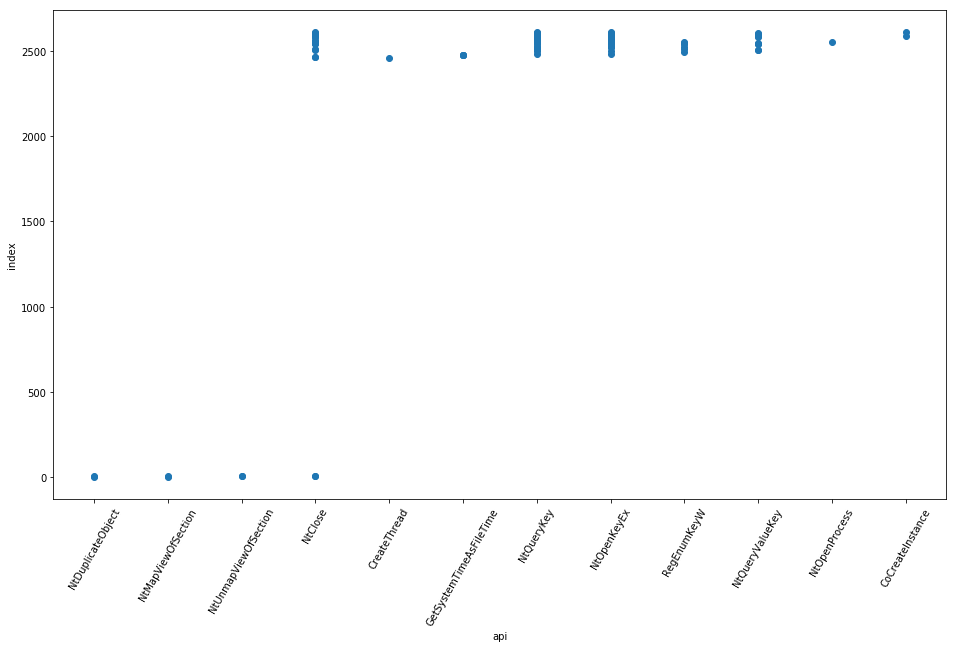

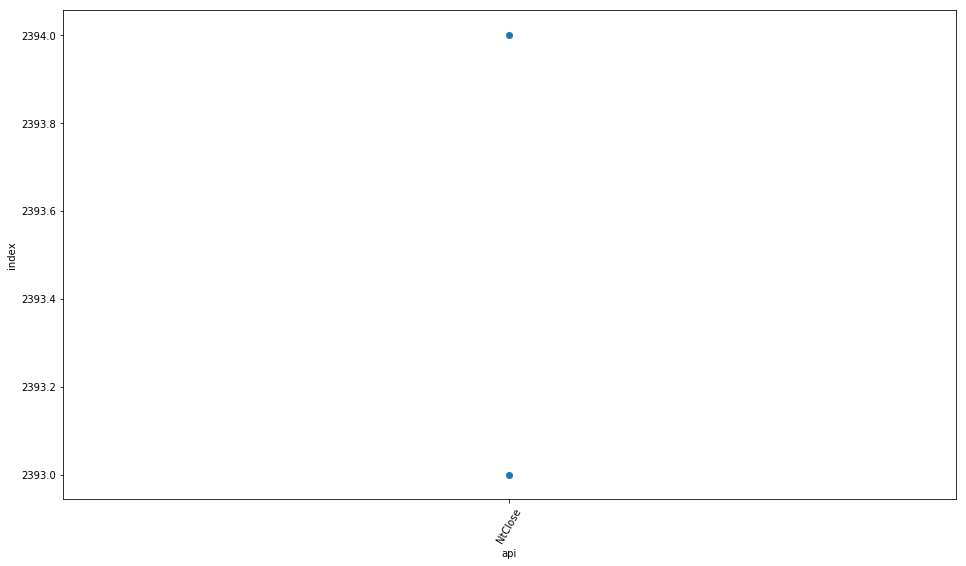

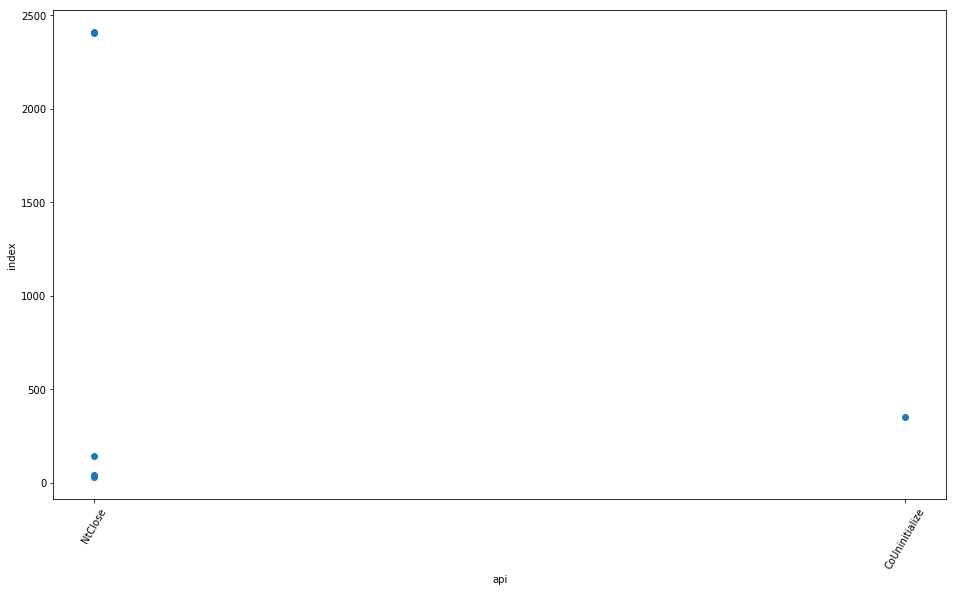

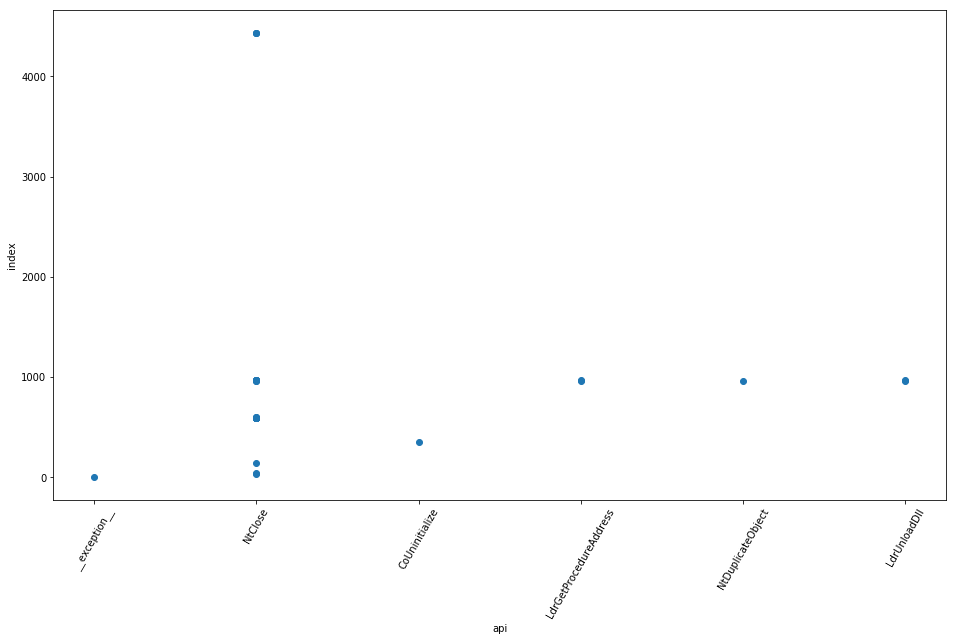

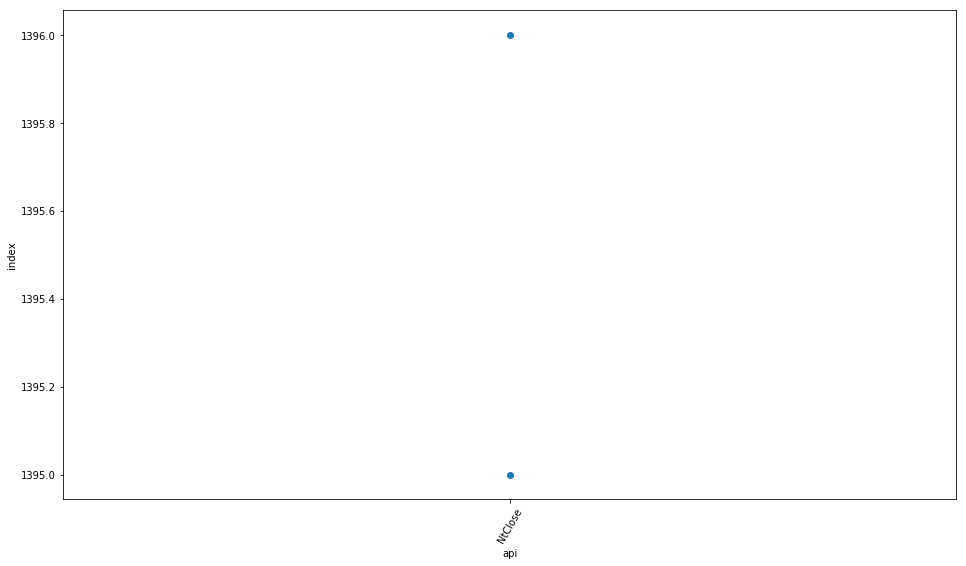

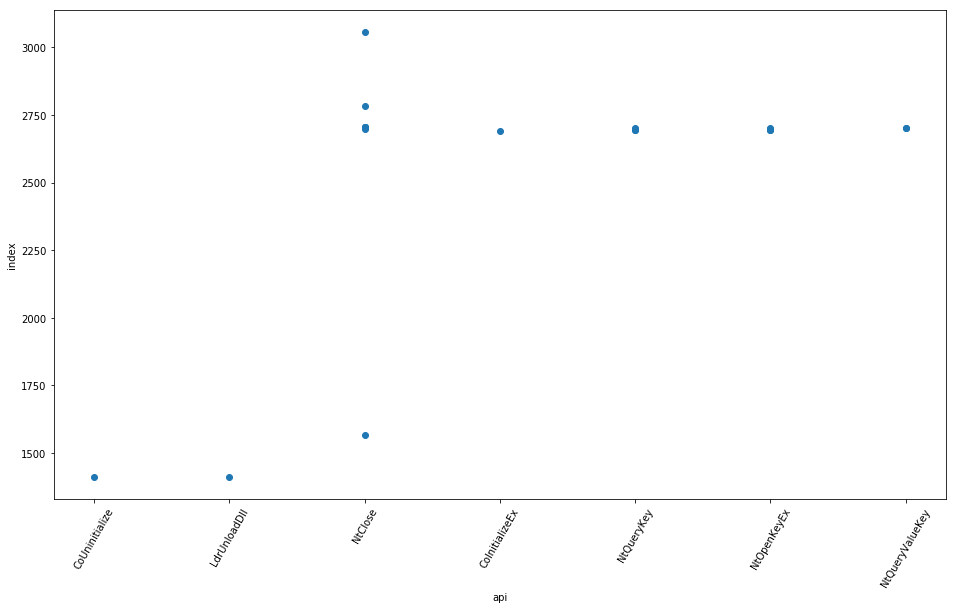

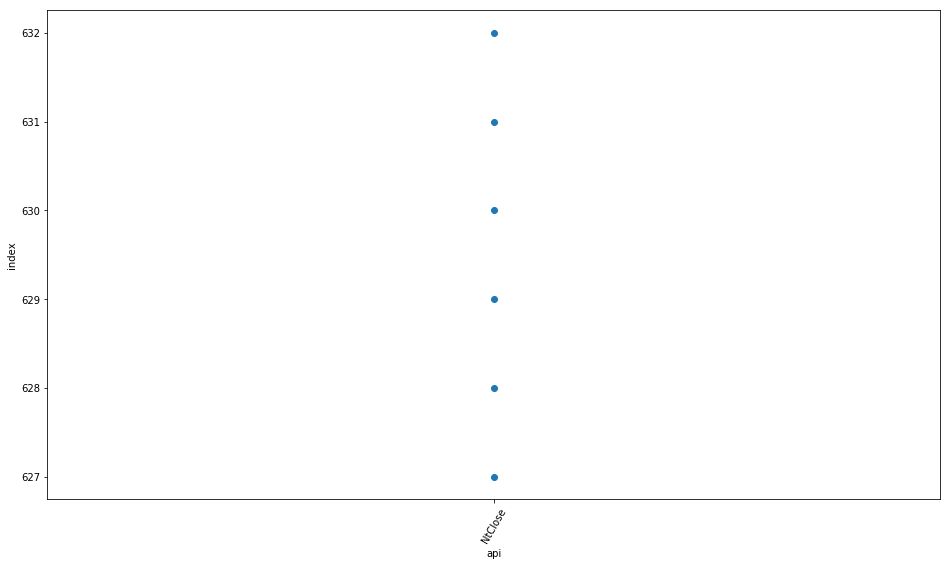

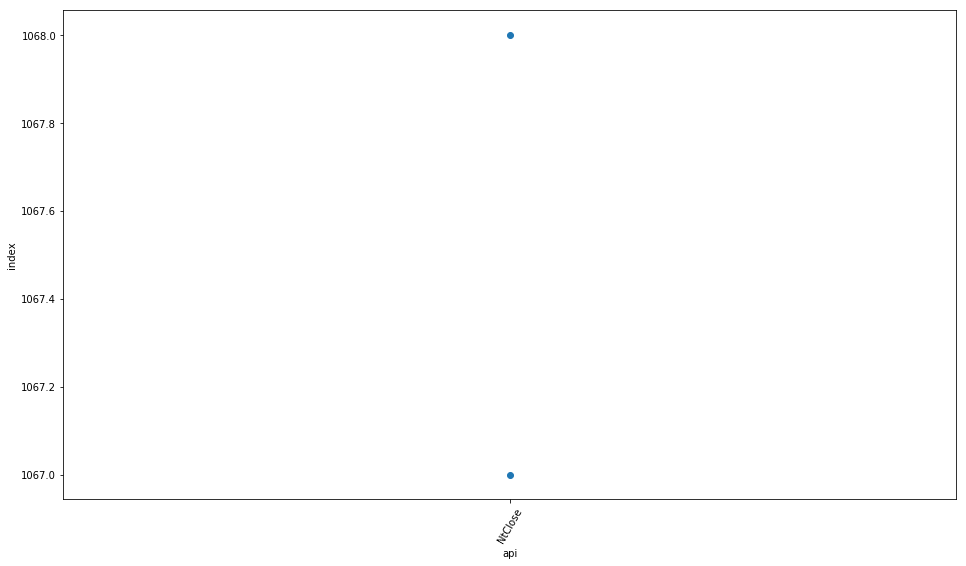

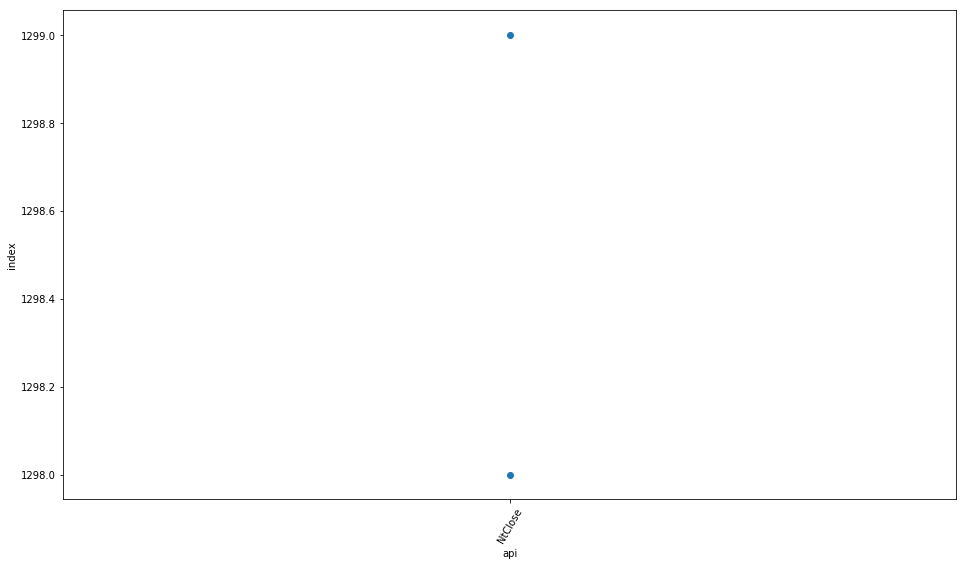

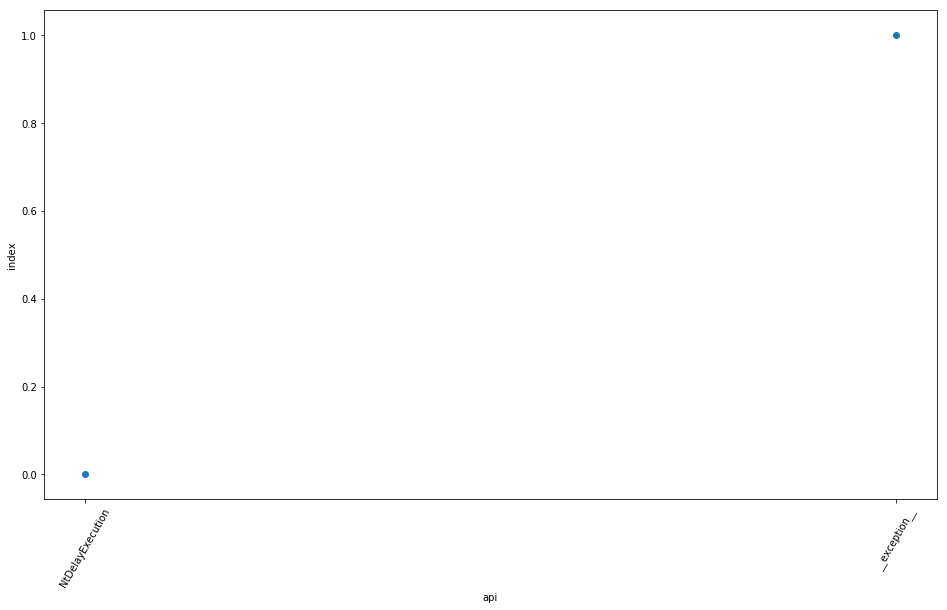

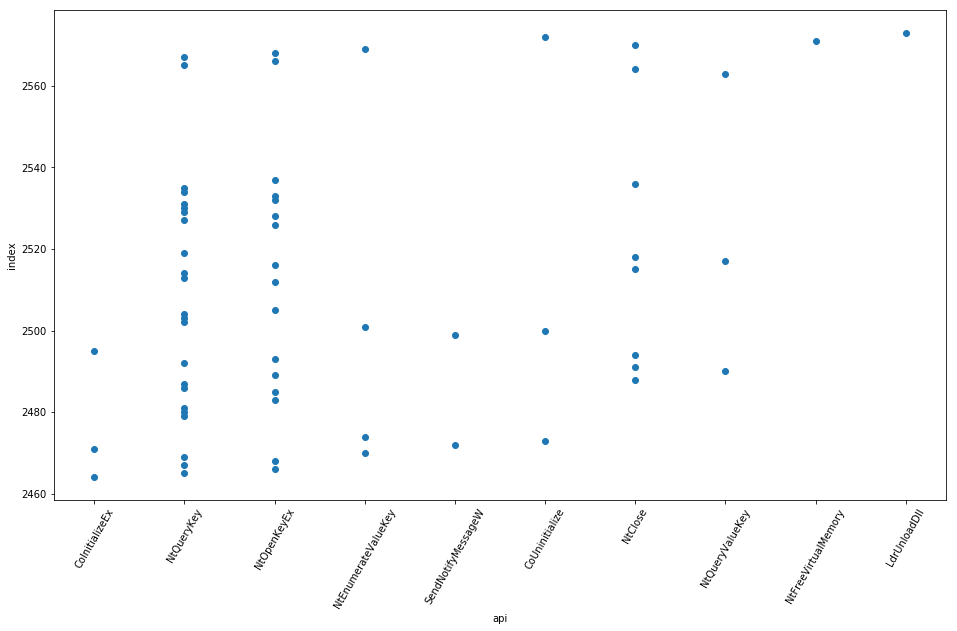

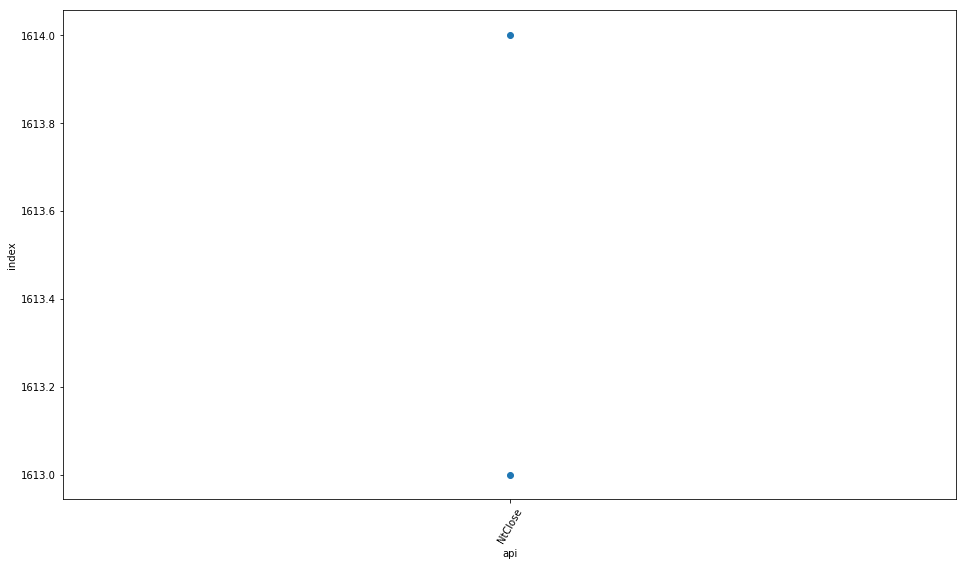

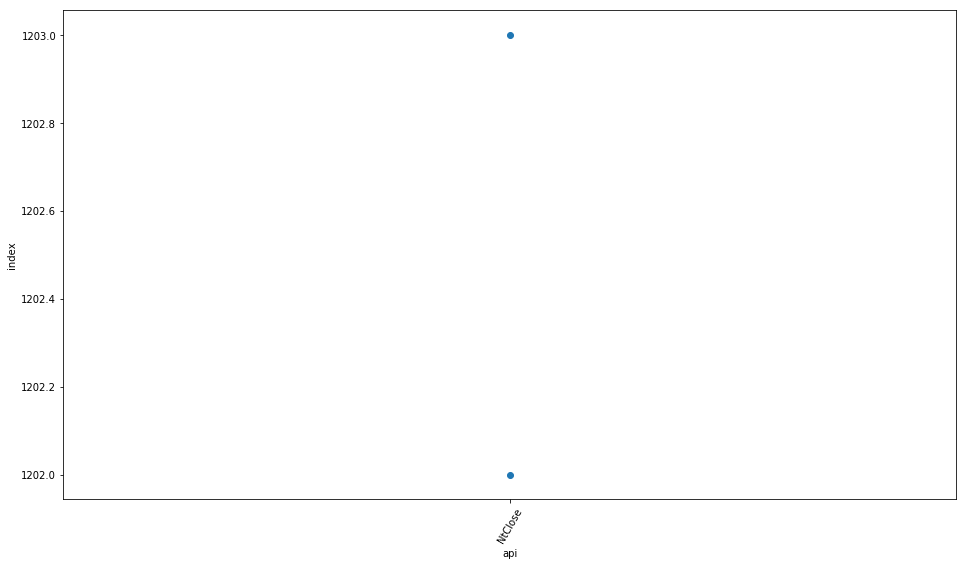

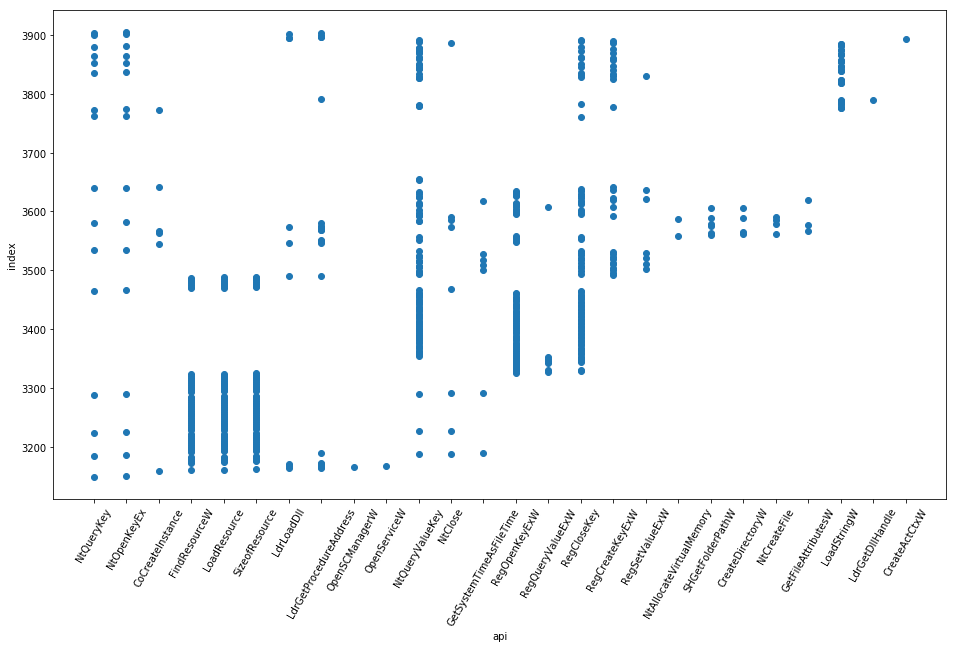

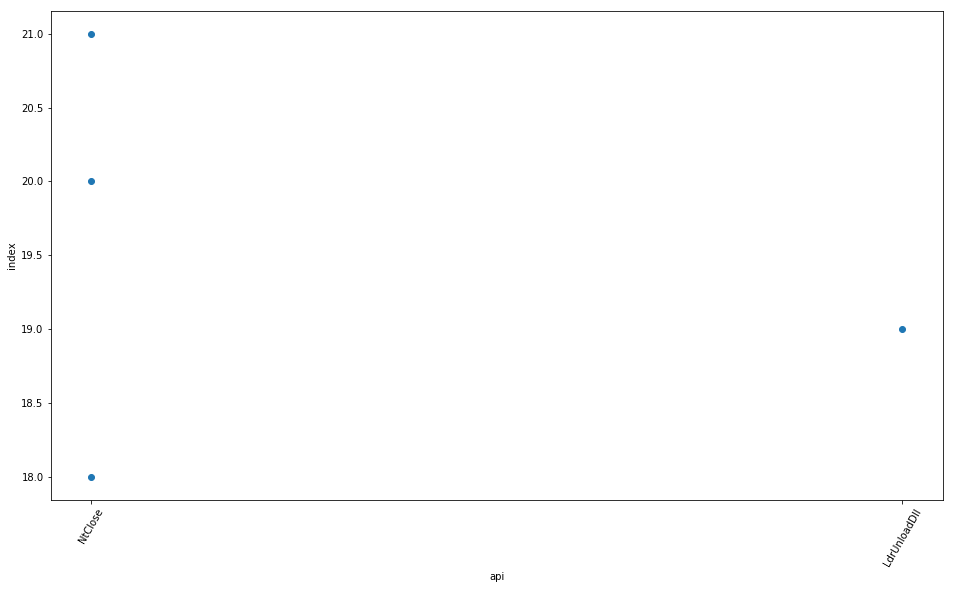

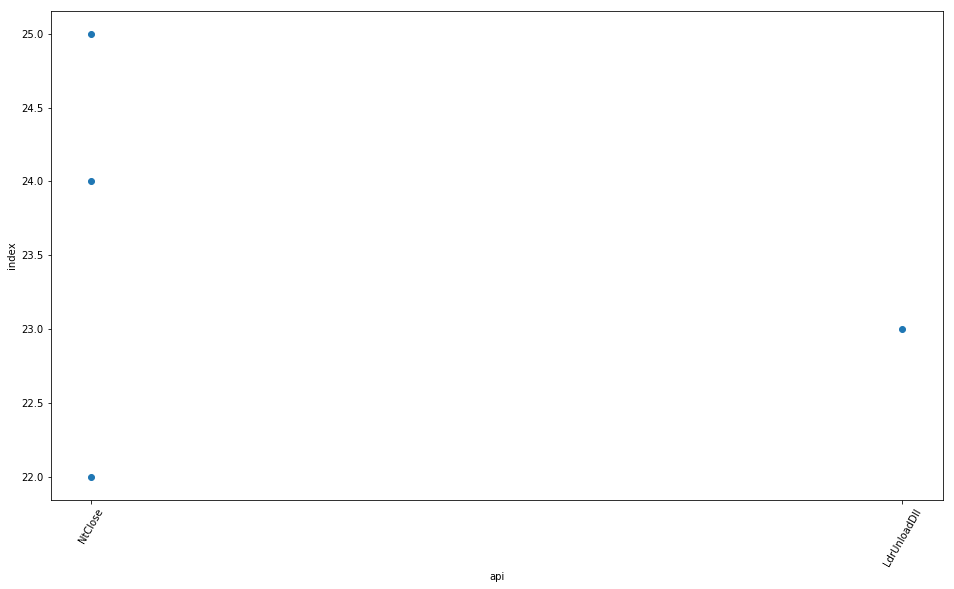

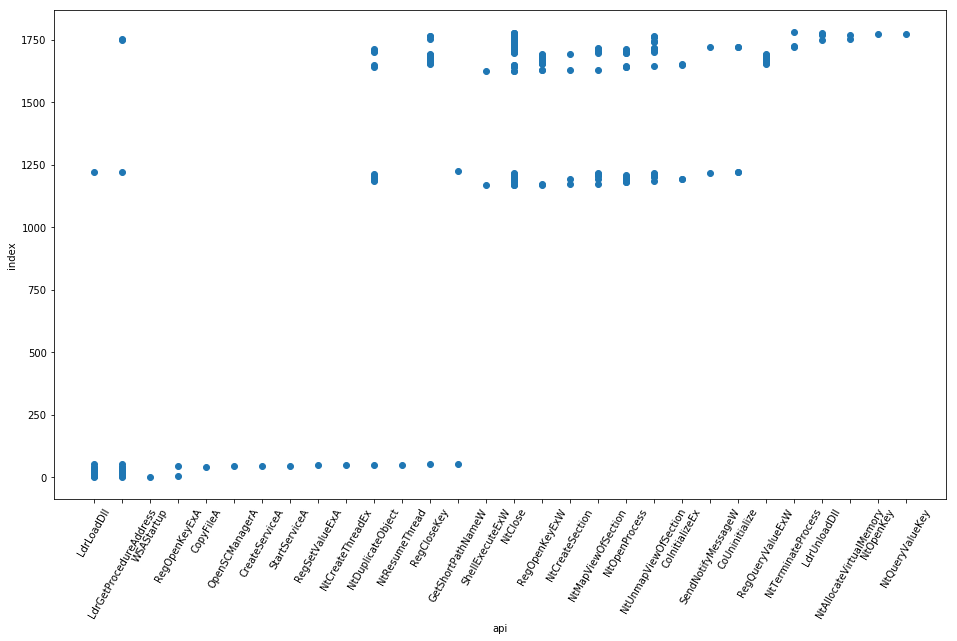

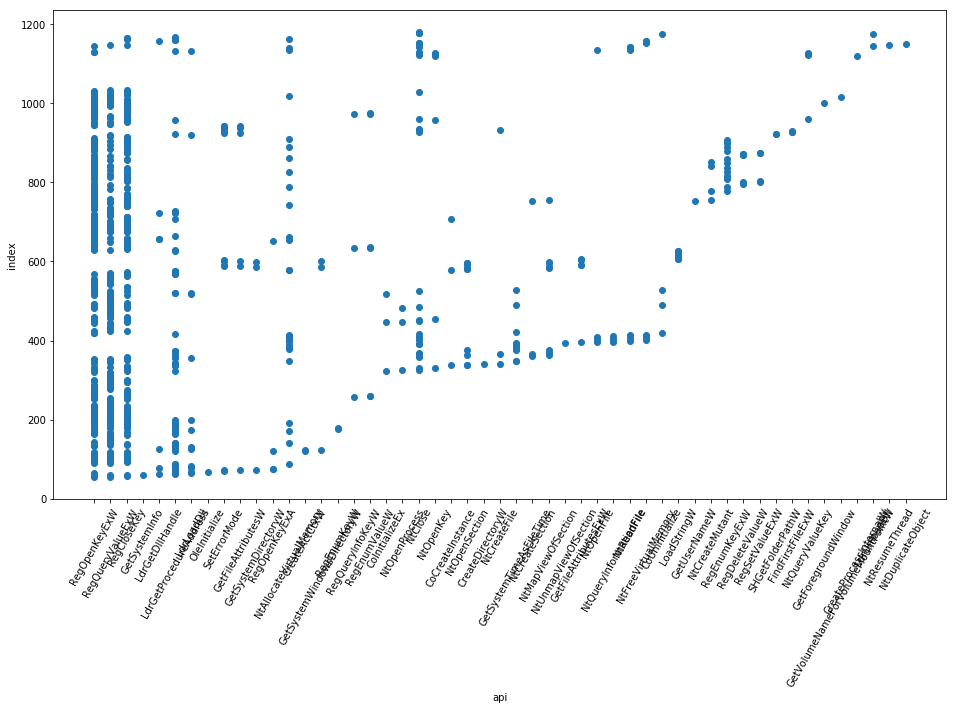

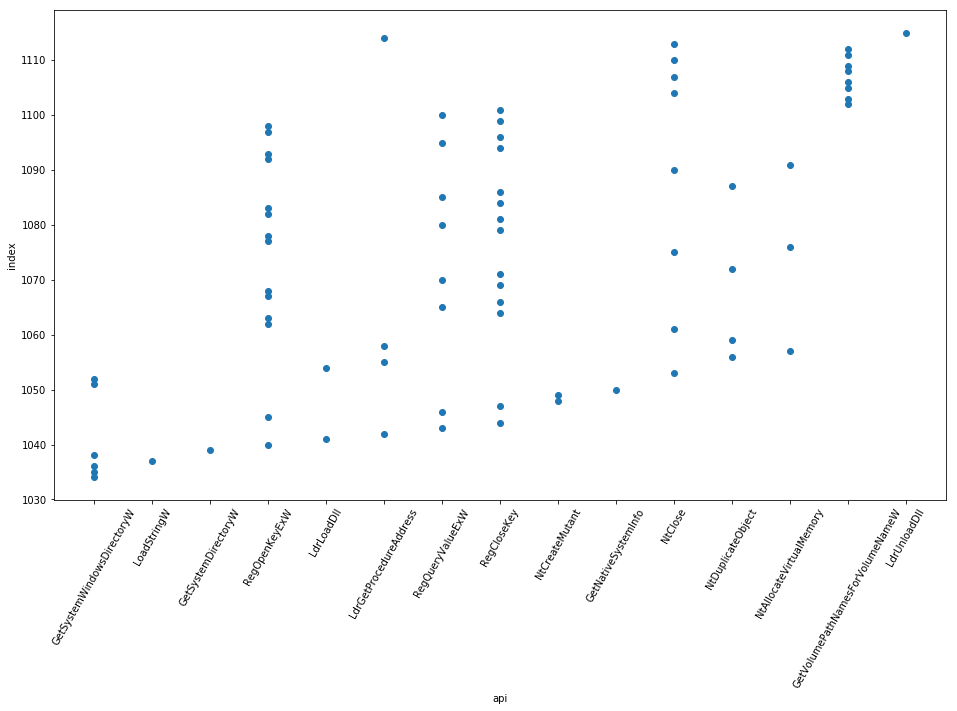

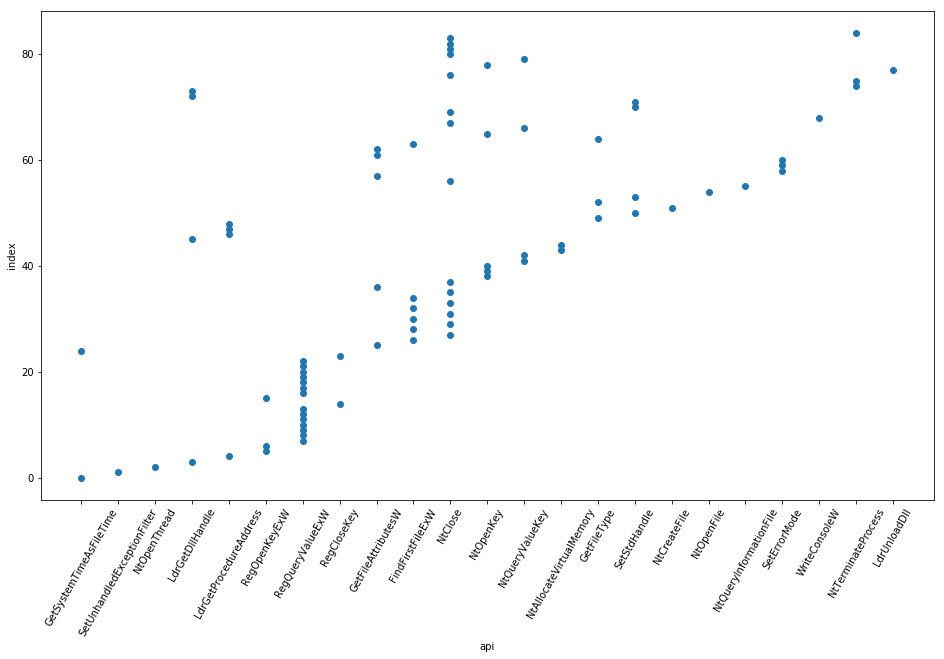

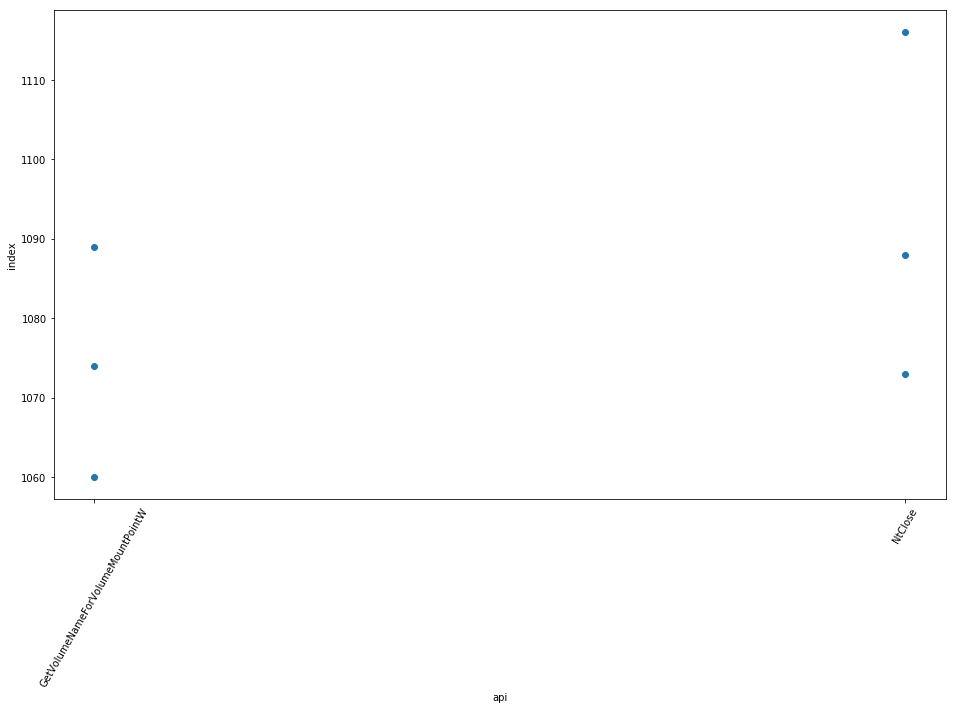

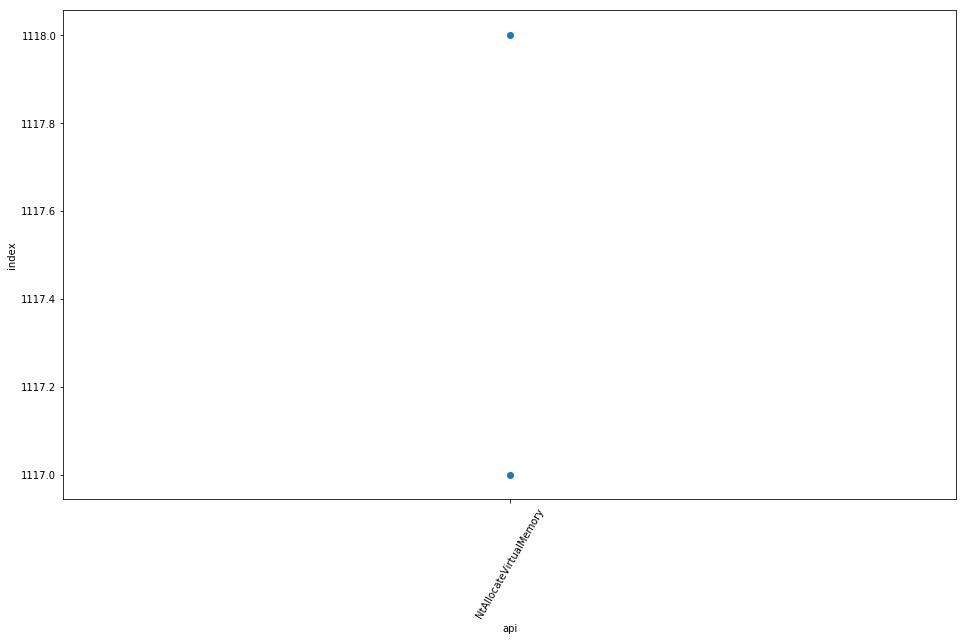

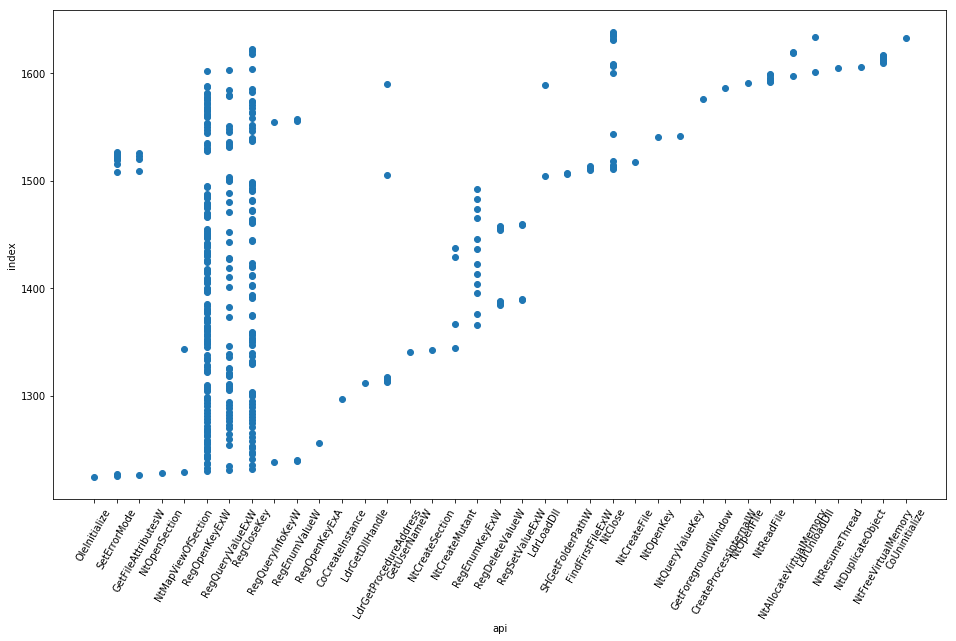

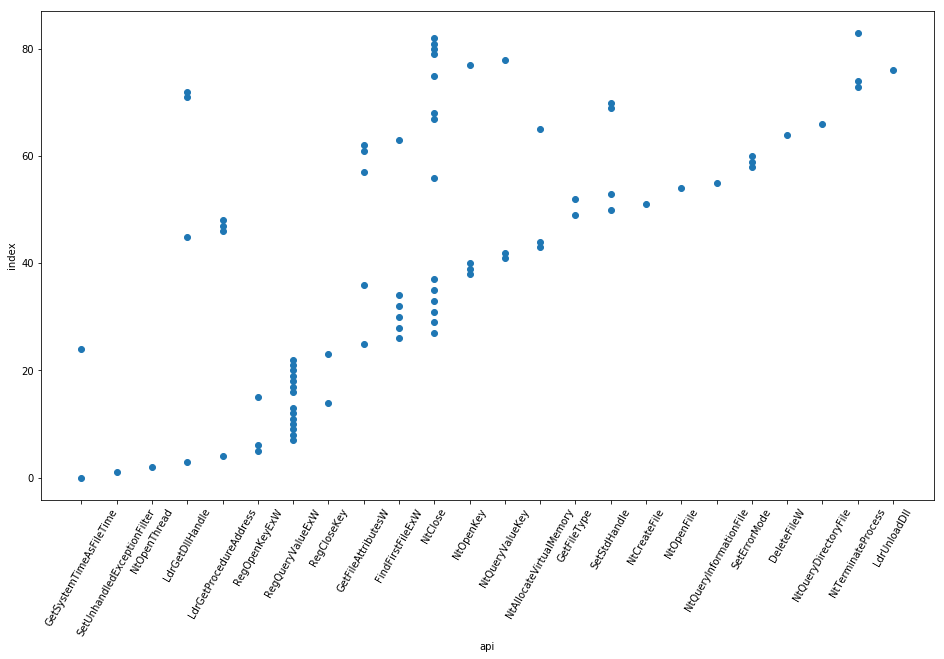

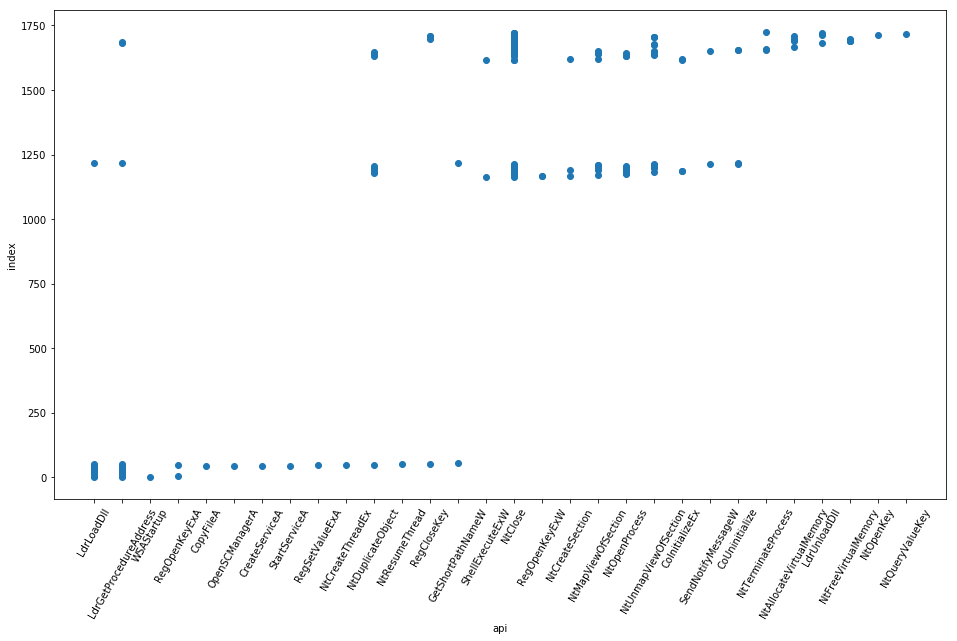

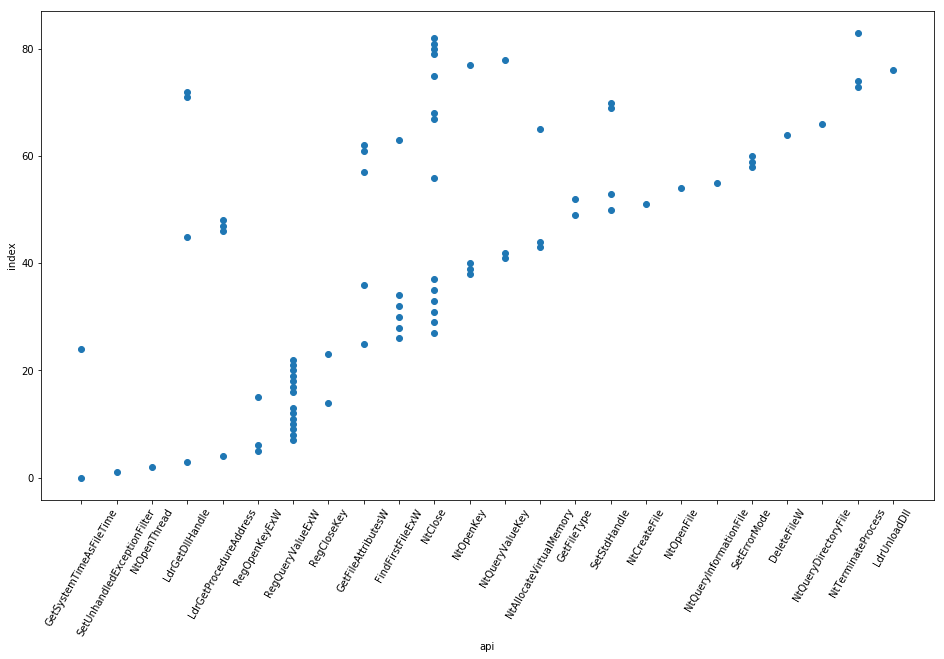

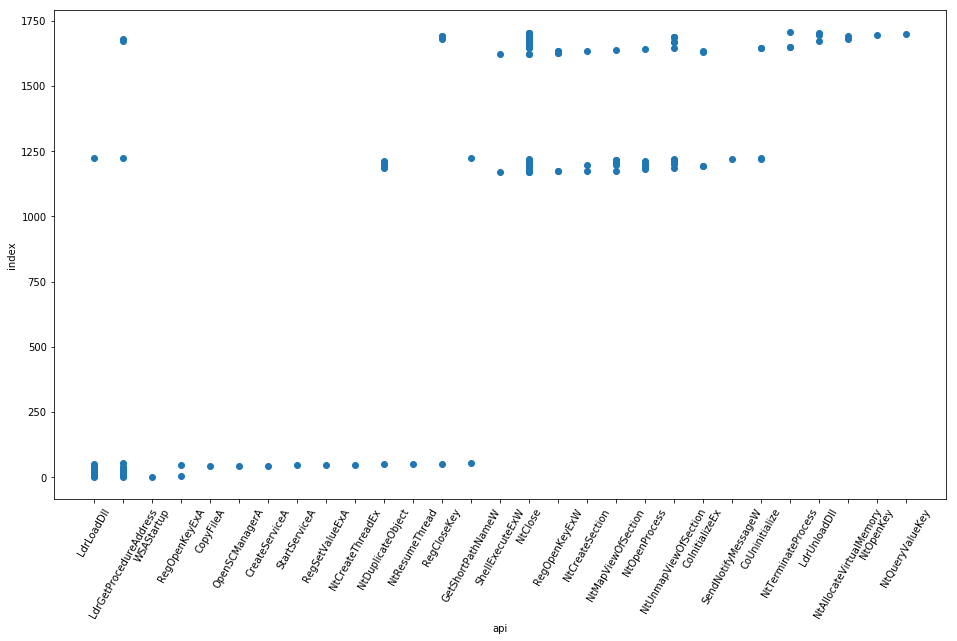

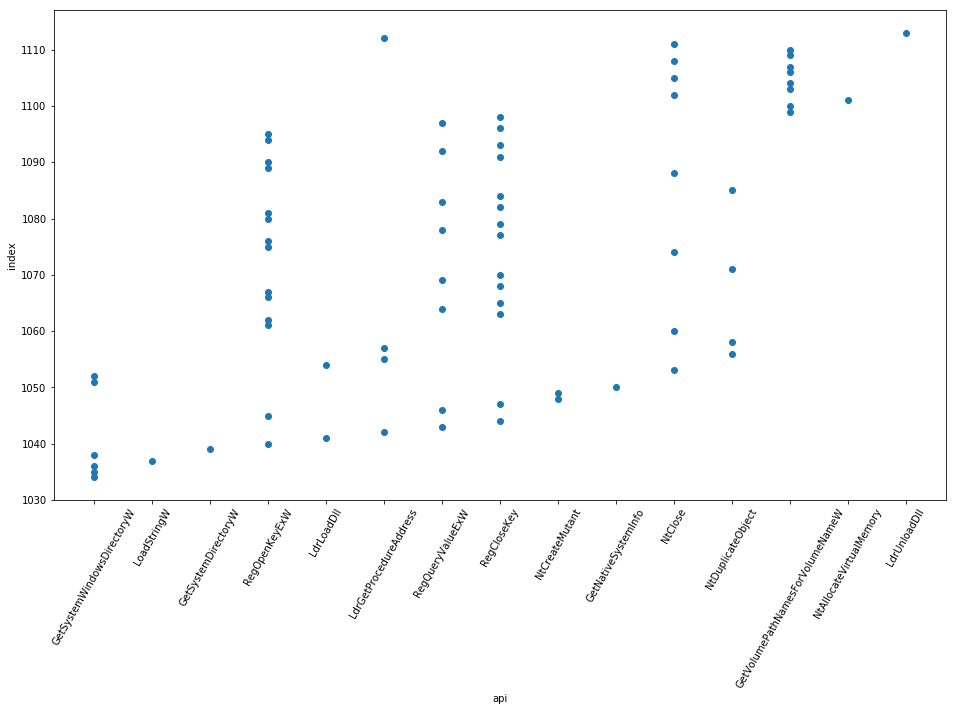

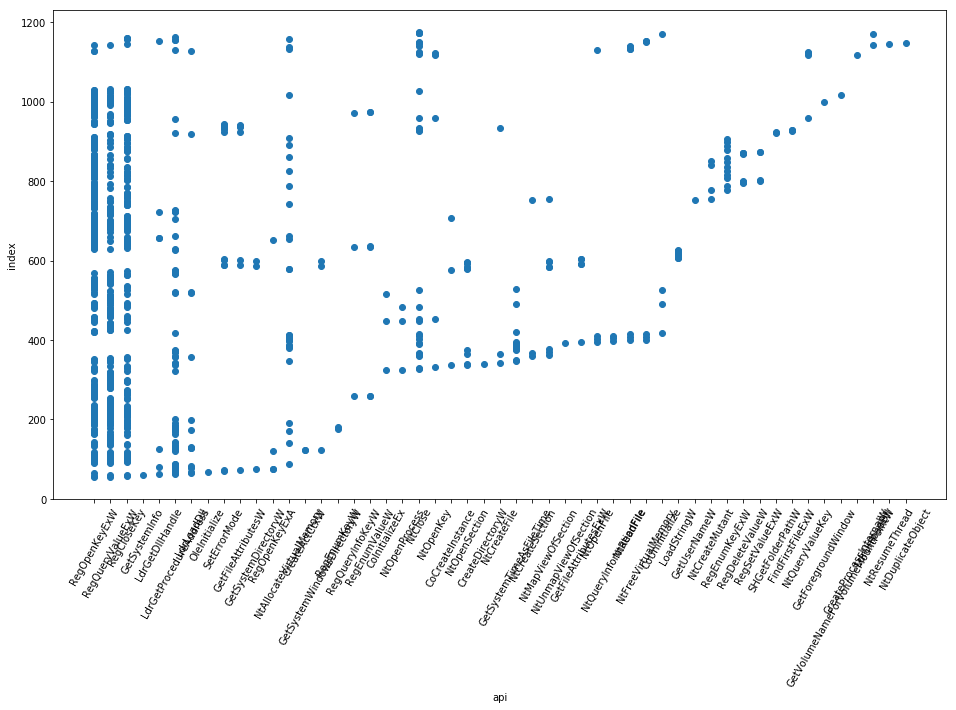

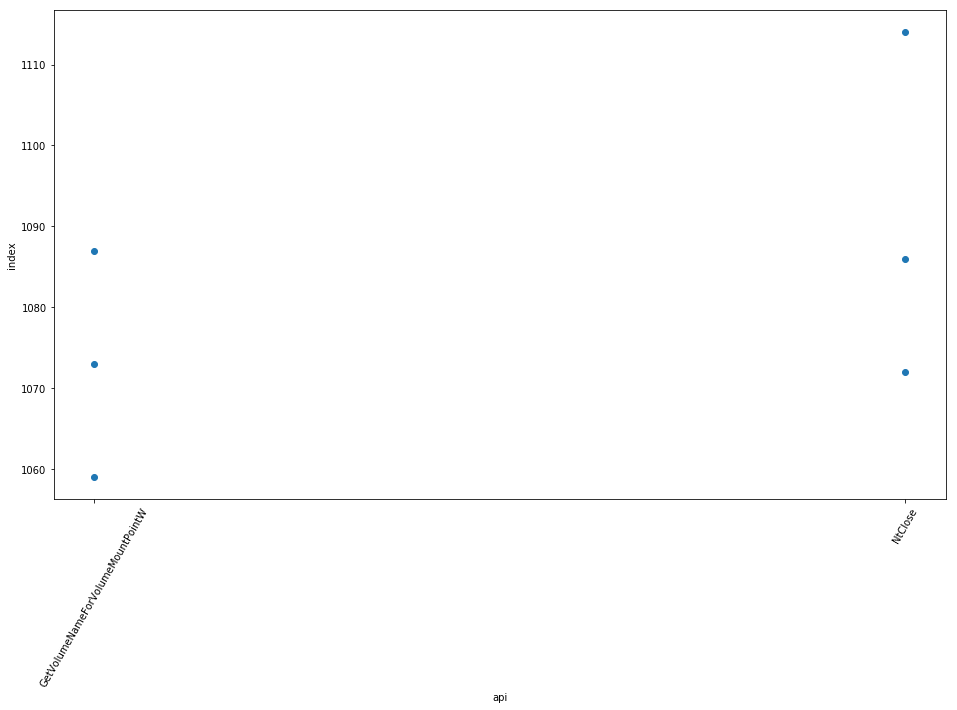

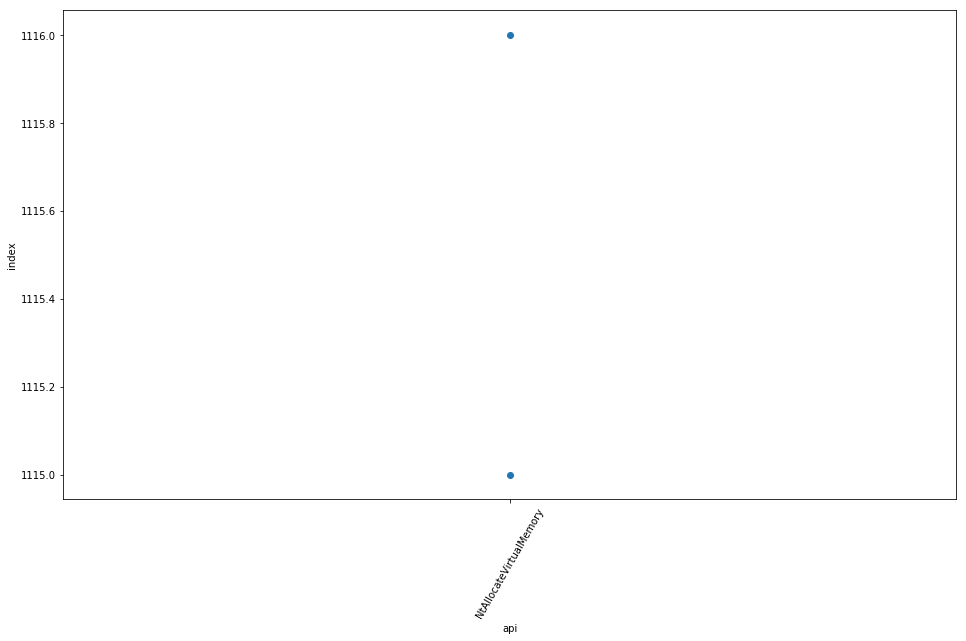

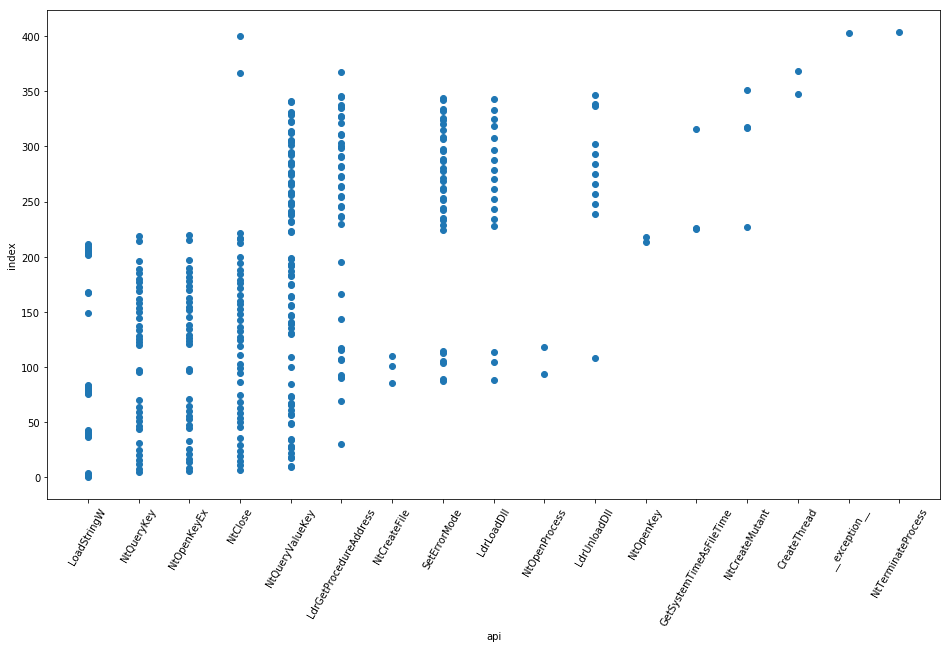

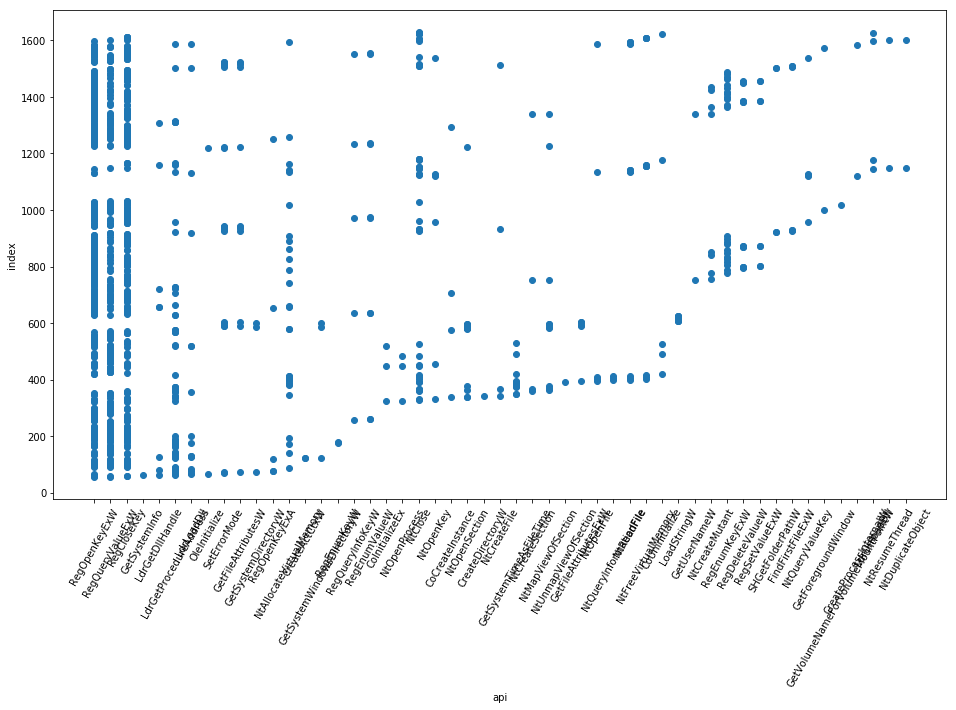

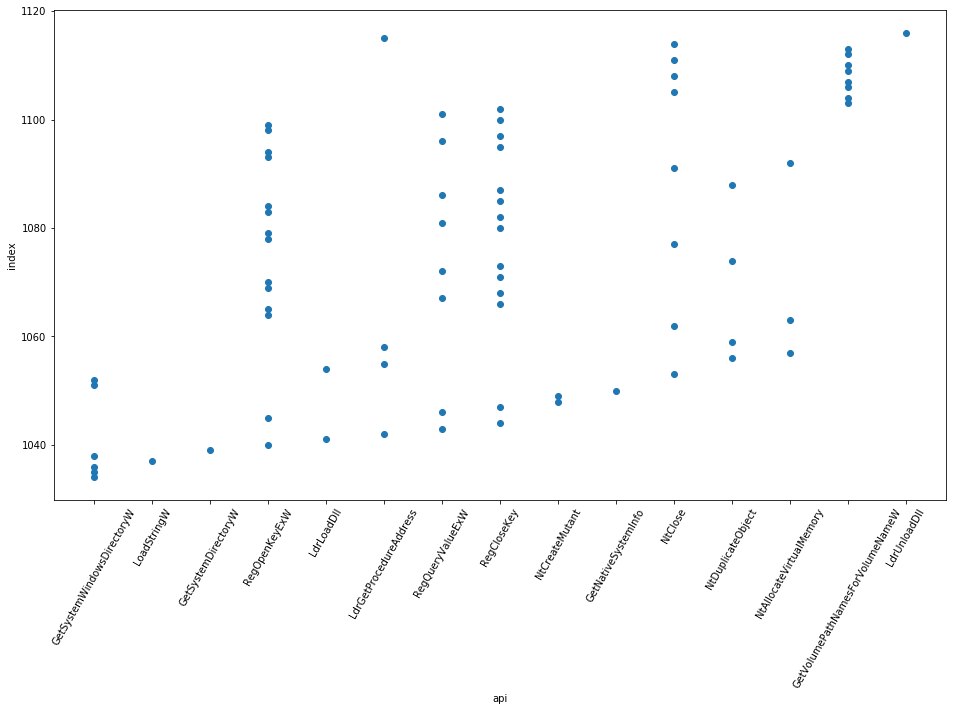

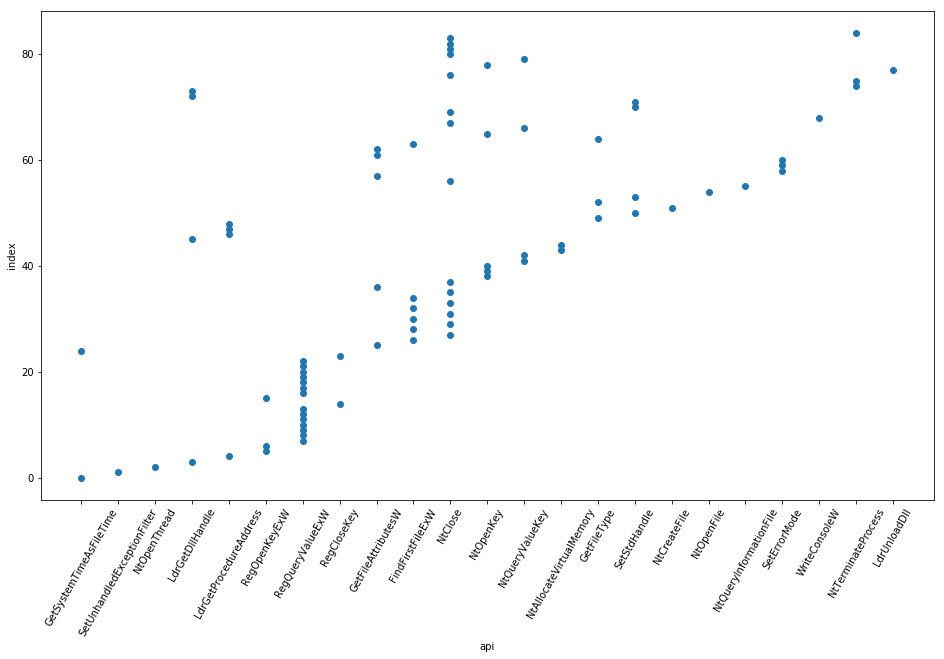

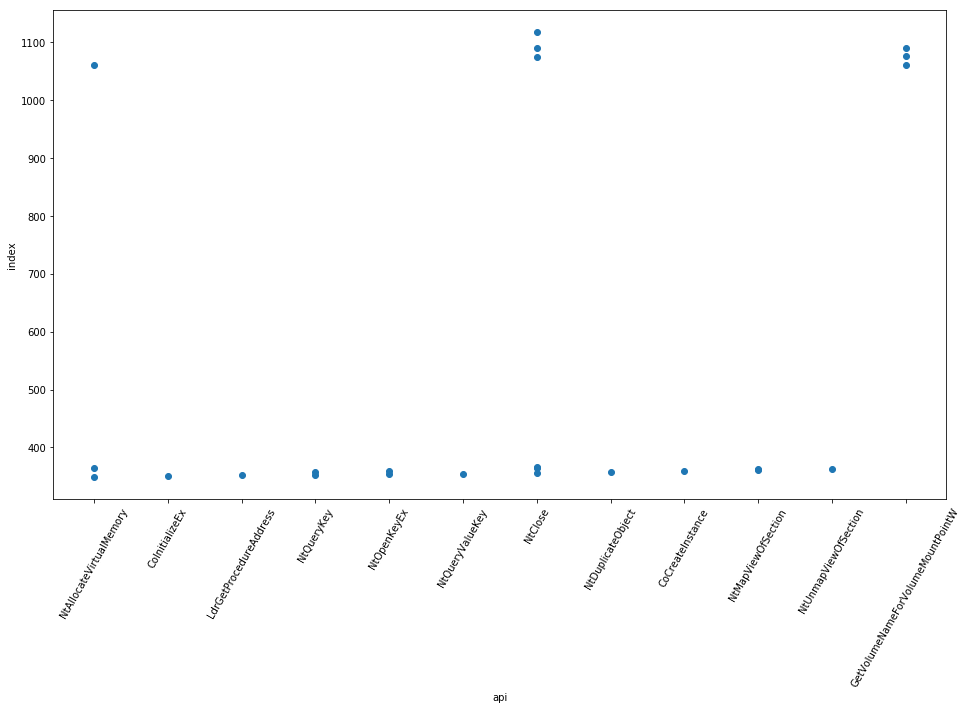

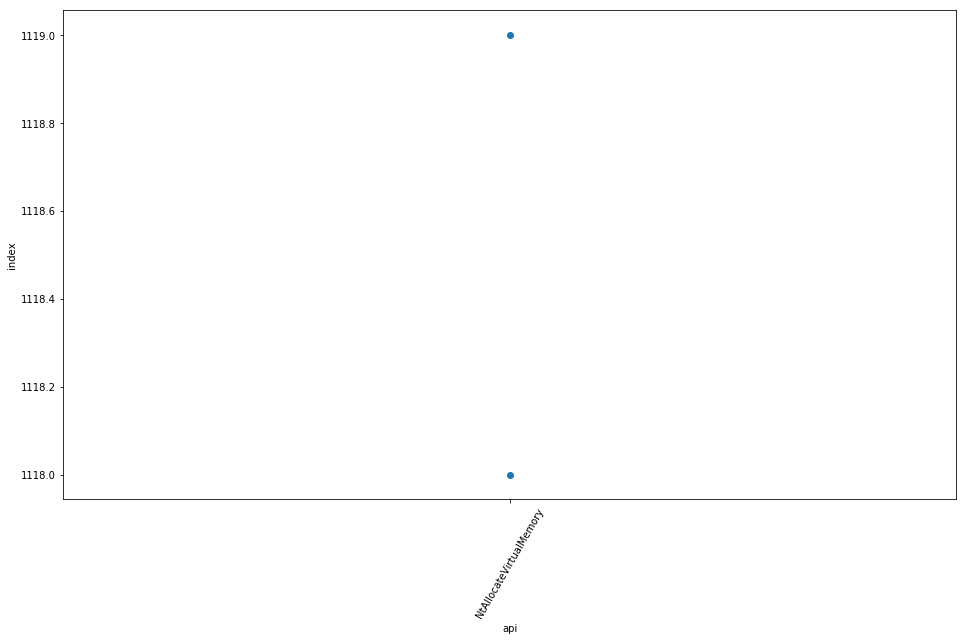

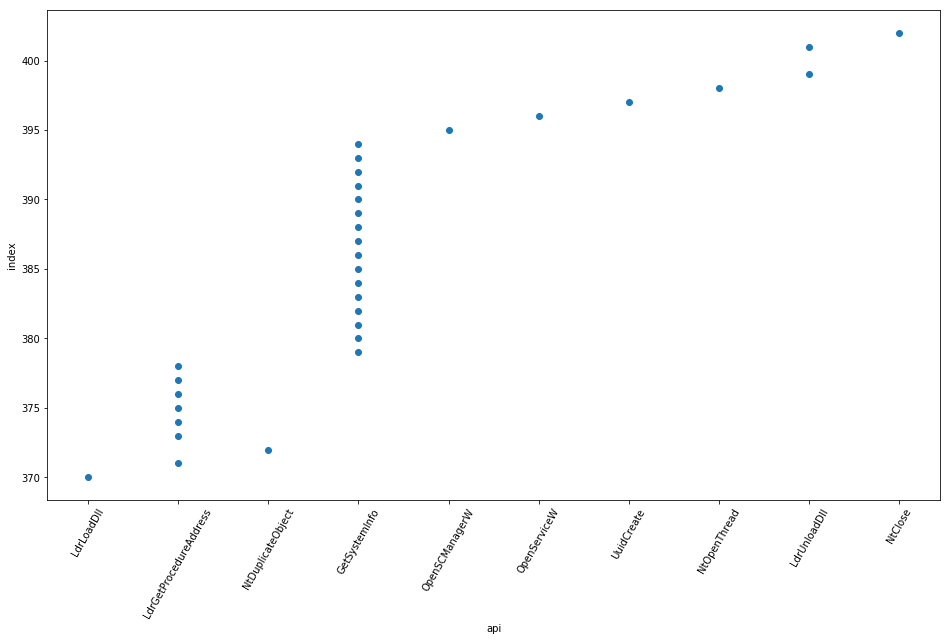

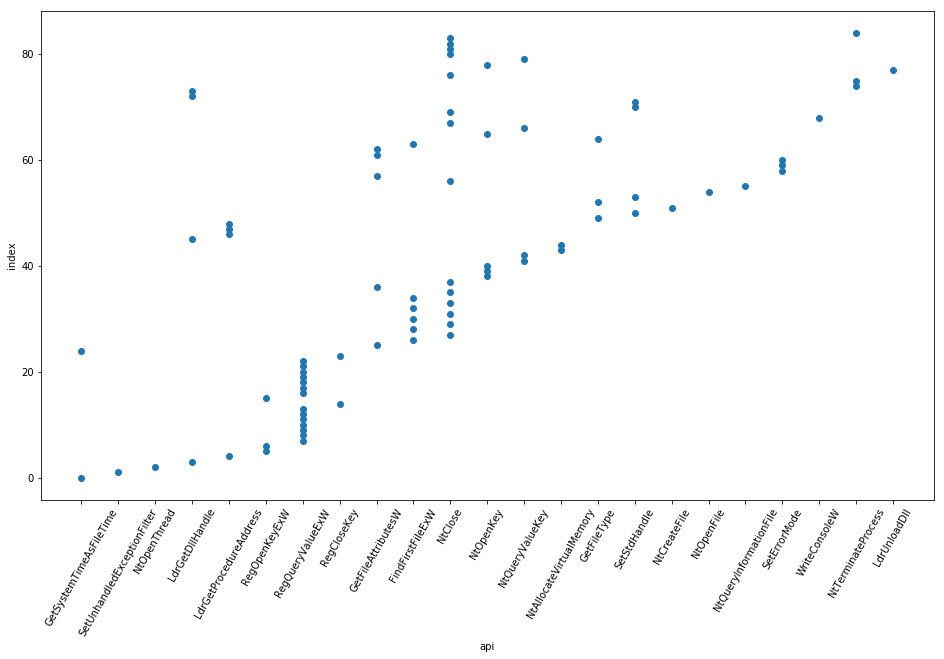

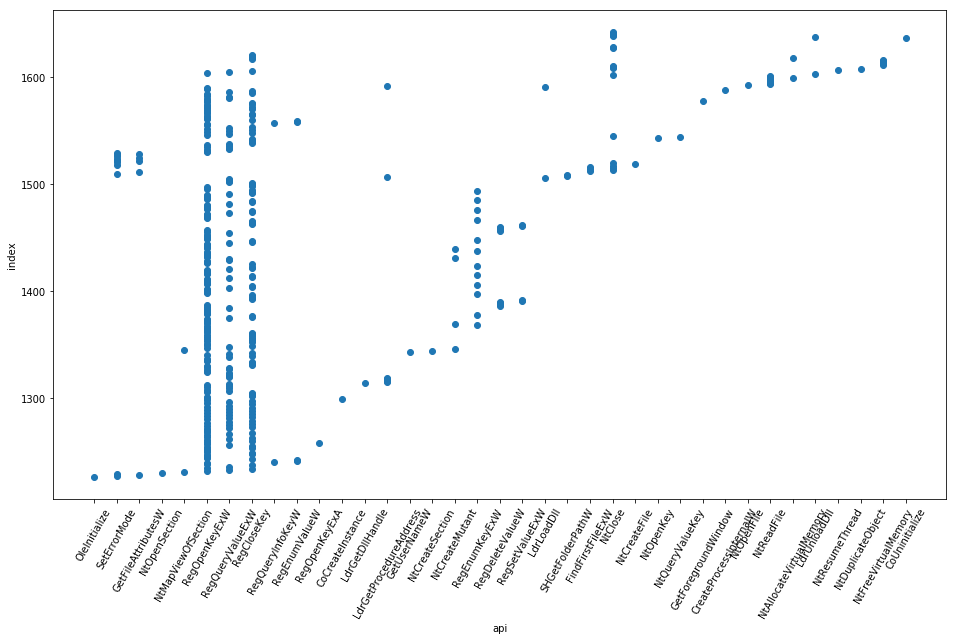

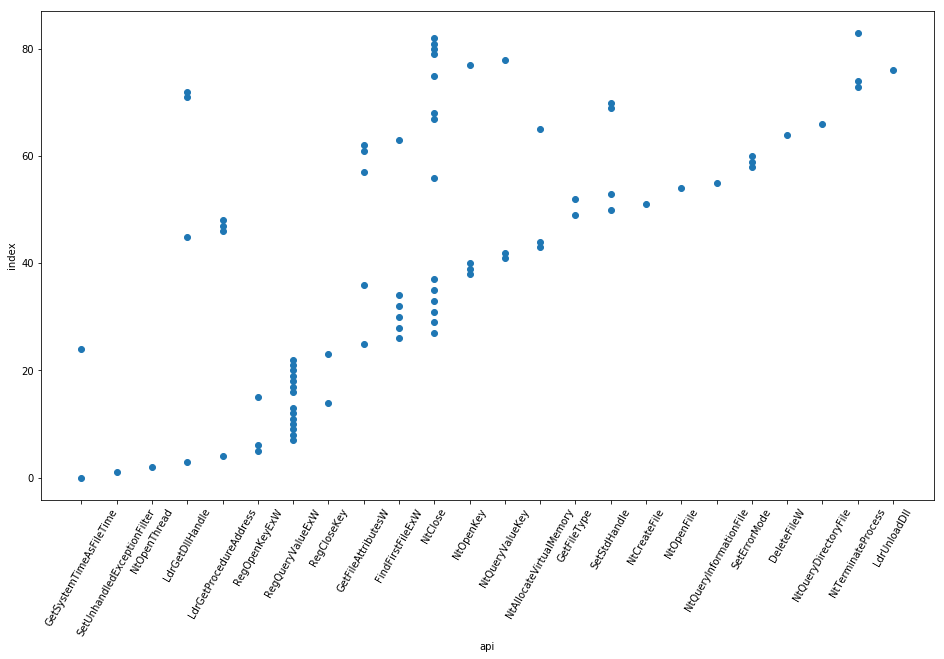

In [52]:
file_2=data_df4[data_df4['file_id']==114548]
#print(file_2)
tid=file_2.groupby('tid')['index','api']
for i,j in tid:
    plt.figure(figsize=(16,9))
    plt.scatter((j['api'].values),j['index'])
    plt.xticks(rotation=60)
    plt.yticks(rotation=360)
    plt.xlabel('api',fontsize=10)
    plt.ylabel('index',fontsize=10)
    plt.show()

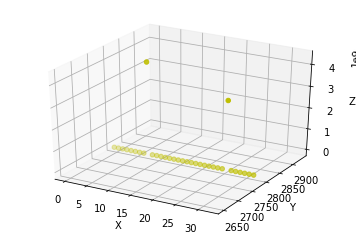

In [53]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
data =np.array(data_df4[data_df4['file_id']==102742][['index','tid','return_value']])
x, y, z = data[:,0], data[:,1], data[:,2] 

ax = plt.subplot(111, projection='3d') # 创建一个三维的绘图工程 #  将数据点分成三部分画，在颜色上有区分度 
ax.scatter(x, y, z, c='y') # 绘制数据点 
#ax.scatter(x[10:20], y[10:20], z[10:20], c='r') 
#ax.scatter(x[30:40], y[30:40], z[30:40], c='g') 
ax.set_zlabel('Z') # 坐标轴 
ax.set_ylabel('Y') 
ax.set_xlabel('X') 
plt.show()


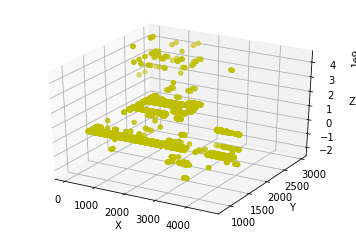

In [54]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
data =np.array(data_df4[data_df4['file_id']==114548][['index','tid','return_value']])
x, y, z = data[:,0], data[:,1], data[:,2] 

ax = plt.subplot(111, projection='3d') # 创建一个三维的绘图工程 #  将数据点分成三部分画，在颜色上有区分度 
ax.scatter(x, y, z, c='y') # 绘制数据点 
#ax.scatter(x[10:20], y[10:20], z[10:20], c='r') 
#ax.scatter(x[30:40], y[30:40], z[30:40], c='g') 
ax.set_zlabel('Z') # 坐标轴 
ax.set_ylabel('Y') 
ax.set_xlabel('X') 
plt.show()


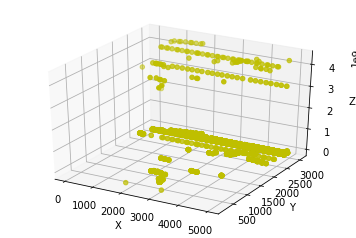

In [55]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
data =np.array(data_df4[data_df4['file_id']==13396][['index','tid','return_value']])
x, y, z = data[:,0], data[:,1], data[:,2] 

ax = plt.subplot(111, projection='3d') # 创建一个三维的绘图工程 #  将数据点分成三部分画，在颜色上有区分度 
ax.scatter(x, y, z, c='y') # 绘制数据点 
#ax.scatter(x[10:20], y[10:20], z[10:20], c='r') 
#ax.scatter(x[30:40], y[30:40], z[30:40], c='g') 
ax.set_zlabel('Z') # 坐标轴 
ax.set_ylabel('Y') 
ax.set_xlabel('X') 
plt.show()


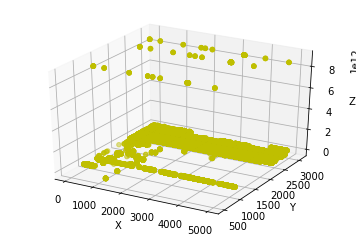

In [56]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
data =np.array(data_df4[data_df4['file_id']==30005][['index','tid','return_value']])
x, y, z = data[:,0], data[:,1], data[:,2] 

ax = plt.subplot(111, projection='3d') # 创建一个三维的绘图工程 #  将数据点分成三部分画，在颜色上有区分度 
ax.scatter(x, y, z, c='y') # 绘制数据点 
#ax.scatter(x[10:20], y[10:20], z[10:20], c='r') 
#ax.scatter(x[30:40], y[30:40], z[30:40], c='g') 
ax.set_zlabel('Z') # 坐标轴 
ax.set_ylabel('Y') 
ax.set_xlabel('X') 
plt.show()
